<a href="https://colab.research.google.com/github/1991Ab/Capstone-Project-4-Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Online Retail Customer Segmentation**



**Project Type**    - Unsupervised

**Contribution**    - Team

**Team Member 1**- Bharat Kumar Soni

**Team Member 2**- Abhilasha 


<p align="center">
  <img 
    src ="https://user-images.githubusercontent.com/90209933/147927776-948a9af0-18bb-49ac-bbc0-30efd2790649.png" width="1000" height="500"/>
</p>

# **Project Summary -**

Before going into the definition of customer segmentation, let us take a look at how online retail works and how the associated data would look like. When a person goes into a retail store and purchases a few items, the following basic data points should be generated:

• Customer Name/Customer ID

• Address/Contact number of the customer (Demographic information)

• Invoice number

• Product name and product code

• Quantity

• Unit Price

• Date and time of the transaction

• Coupon Code (if applicable)

• Discount amount (if applicable)

Now that we have developed a basic idea about how retail data looks like, let us think about how a company should think in order to make effective marketing policies.

One axiom frequently used in business and economics is the Pareto principle. This can be applied to understanding the revenue stream of a company as well.

***As per the Pareto Principle, 80% of outcomes result from 20% of all the causes of any given event.***

In business terms, we can say that 20% of customers contribute 80% share of the total revenue of a company. That’s why finding this set of people is important.

### **Understanding Customer Segmentation**

• Customer segmentation is the process of separating a company's customers into groups based on their shared characteristics. The purpose of customer segmentation is to determine how to relate to customers in each category in order to optimize each customer's value to the company. 

• Customer segmentation has the ability to help marketers reach out to each customer in the most efficient way possible. A customer segmentation study uses the huge quantity of data available on customers (and future customers) to identify distinct groups of consumers with a high degree of accuracy based on demographic, behavioural, and other characteristics.

• Insights from customer segmentation are used to develop tailor-made marketing campaigns and for designing overall marketing strategy and planning.

• To conclude, we saw how we can segment our customer depending on our business requirements. You can perform RFM for your entire customer base, or just a subset. For example, you may first segment customers based on a geographical area or other demographics, and then by RFM for historical, transaction-based behaviour segments.

• RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest. We used the K-means algorithm to segment our customer in various clusters having similar similarity. I think K-means did a pretty good job here.



##**Project/Colab Overview**

• Feature summary 

• Insights from our Dataset

• Analysis on unique values in each column

• Analysis on top Country

• Analysis on top products

• Analysis on  cancelled order

• Distribution

• Analysis on Customer data

• Analysis of  Negative Quantities

• RFM MODEL 

• Recency 

• Frequency 

• Monetary

• QQ Plot on R-M-F

• Outlier treatment (IQR Process)

• Modelling 

• K-Means clustering

• Silhouette  Analysis 

• Elbow method

• Box plot on R-F-M

• Hierarchical clustering

• 3-D visualization on R-F-M

• Challenges

• Solution to Business Objective

• Conclusion 

# **Problem Statement**



In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**BUSINESS PROBLEM OVERVIEW**



The goal of this job is to use cluster analysis to identify important consumer categories in a transnational data set that encompasses all transactions for a UK-based and registered non-store internet retailer over a specific time period

# **Github Link-**

https://github.com/1991Ab/Capstone-Project-4-Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Dataset Loading

In [2]:
# Mounting Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
df = pd.read_excel('/content/drive/MyDrive/Capstone project -4/Online Retail (1).xlsx')

### Dataset First View

In [4]:
# Dataset First 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,max(E),2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns 
df.shape

(541909, 8)

The given data set has 541909 rows and 8 columns

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

5268

The data set has 5268 duplicate values which has to be removed

In [9]:
#dropping the duplicate data
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(536641, 8)

We can see that the number of has been reduced to 536641 after the removal of duplicates.

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


<Axes: >

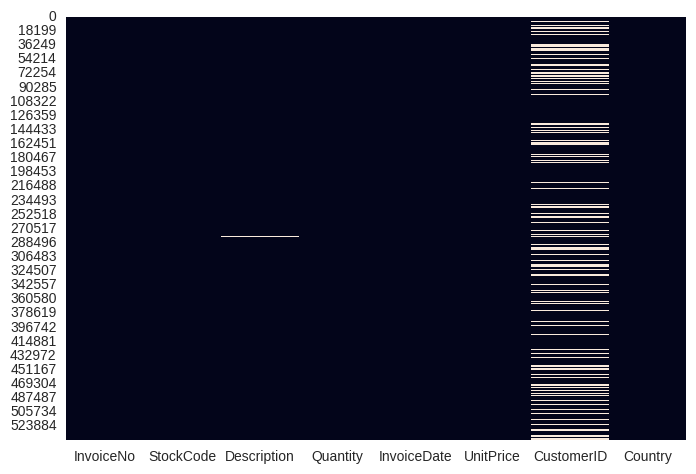

In [12]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

We can see that the column 'Customer ID' has maximum number of null values followed by the column 'Description' in the dataset

### What did you know about your dataset?

• Total Rows : 541909, Total Column: 8 

• The given data set is a transactional data set with transactions occurring between 1st December   2010 and 9th December 2011 for a UK-based online retailer.Many customers of the company are wholesalers. 

• There are a lot of null values in Description & Customer ID columns.

• There were 5268 duplicates values in our dataset. After romval of these  duplicate values ,the number of rows are : 536641  and number of columns are : 8

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
# Dataset Describe
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,536641.0,536641,535187,536641.000000,536641,536641.000000,401604.000000,536641
unique,25900.0,4070,4223,NaN,23262,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2301,2357,NaN,1114,NaN,NaN,490300
mean,NaN,NaN,NaN,9.620029,NaN,4.632656,15281.160818,NaN
std,NaN,NaN,NaN,219.130156,NaN,97.233118,1714.006089,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15145.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16784.000000,NaN


### Variables Description 

**Variable Description**

• InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

• StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

• Description: Product (item) name. Nominal. 

• Quantity: The quantities of each product (item) per transaction. Numeric. 

• InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 

• UnitPrice: Unit price. Numeric, Product price per unit in sterling.

• CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23262 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


## ***3. Data Wrangling***

**Analysing the count of different products in the store**

In [17]:
product_num=df["StockCode"].value_counts().reset_index().sort_values(by="StockCode" , ascending=False).rename(columns={"index" : "StockCode" , "StockCode" : "Number"})
product_num


,StockCode,Number
0,85123A,2301
1,22423,2192
2,85099B,2156
3,47566,1720
4,20725,1626
...,...,...
3917,84206B,1
3918,90162A,1
3919,37503,1
3920,23652,1


From the above code we see that the product with code "**85123A**" is present at highest number .May be it is a very popular product.

The product with code "**22423**" is in second position and the product with "**85099B**" is in third position.

**Finding the top 10 countries which have the highest number of orders**




**Here, we will  analyse the number of countries from which orders were made:**

In [18]:
top_ten=df.groupby("Country")["InvoiceNo"].count().reset_index().sort_values(by="InvoiceNo" , ascending=False).rename(columns = { 'InvoiceNo':'Number of orders' })

In [19]:
top_ten.shape

(38, 2)

In [20]:
top_ten.head(10)

,Country,Number of orders
36,United Kingdom,490300
14,Germany,9480
13,France,8541
10,EIRE,8184
31,Spain,2528
24,Netherlands,2371
3,Belgium,2069
33,Switzerland,1994
27,Portugal,1510
0,Australia,1258


**Since the data, taken from the UCI Machine Learning repository describes the data to based on transactions for a UK-based and registered non-store online retail, let us check the percentage of orders from each country in the data.**


In [21]:
## Adding country percentage column to top 10 countries data frame
top_ten['Country_percent']= top_ten['Number of orders']*100/df['InvoiceNo'].count()
top_ten.head(10)

,Country,Number of orders,Country_percent
36,United Kingdom,490300,91.364618
14,Germany,9480,1.766544
13,France,8541,1.591567
10,EIRE,8184,1.525042
31,Spain,2528,0.471078
24,Netherlands,2371,0.441822
3,Belgium,2069,0.385546
33,Switzerland,1994,0.371571
27,Portugal,1510,0.281380
0,Australia,1258,0.234421


From the above data we can infer that 'United Kingdom' is the country to have transacted the highest beign 91.43% ,followed by Germany  which is 1.76 % and France which is 1.59%. The country lowest in transaction is Australia with 0.23 transaction percentage.

**Now , we shall analyse the  cancelled orders:**

We have an atrribute named "InvoiceNo:" 


InvoiceNo: Invoice number which is a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**Let us now look at the number of cancelled orders in the dataset.**

In [22]:
# String to be searched in start of string 
cancel ="C"
  
# boolean series returned with False at place of NaN
cancel_list = df["InvoiceNo"].str.startswith(cancel, na=False)
  
# displaying filtered dataframe
canceled_order = df[cancel_list]

canceled_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [23]:
# Checking the shape of the cancelled order dataset
canceled_order.shape

(9251, 8)

There are 9251 orders which were cancelled

In [24]:
# Checking the percentage of no. of orders cancelled 
cancel_percentage = canceled_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_percentage

1.7238712658928408


This shows that **9251 (approx 1.72%)** were such orders which were **canceled** by the customers across different countries.


**Now we will check  the top 10 countries from where the orders were canceled.**


In [25]:
country_cancel = canceled_order.groupby('Country')['InvoiceNo'].count().reset_index().sort_values(by="InvoiceNo" , ascending=False).rename(columns={"InvoiceNo" : "Number of canceled orders"})
country_cancel.head(10)


,Country,Number of canceled orders
29,United Kingdom,7821
12,Germany,453
8,EIRE,301
11,France,148
28,USA,112
0,Australia,74
25,Spain,48
16,Italy,45
3,Belgium,38
17,Japan,37


We can see that maximum orders were cancelled by "United Kingdom" , followed by "Germany" and "Eire".Japan comes in 10th position.

### **Taking a look at the Monthly sales data.**

In [26]:
# To look at the monthly sales data, first we need to create a separate month column out of date.
# Also lets create separate column for day, month, year etc. Also create columns that contain proper names of months and days.
#Converting the data type "Invoice Date" to date_time  data type.
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'] , errors='coerce')
df['Day_num'] = df['InvoiceDate'].dt.day
df['Month_num'] = df['InvoiceDate'].dt.month
df['Year'] = df["InvoiceDate"].dt.year 

# creating columns that contain proper months and day names for better understanding.
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()       

# seeing the new data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_num,Month_num,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,NaT,2.55,17850.0,United Kingdom,NaN,NaN,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.0,12.0,2010.0,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,December,Wednesday


In [27]:
# Looking at monthly sales data.
month_df = df['Month'].value_counts().reset_index().sort_values(by="Month" , ascending=False).rename(columns={"index" : "Month" , "Month" : "Monthly sales data"})
month_df

,Month,Monthly sales data
0,November,83343
1,December,67226
2,October,59969
3,September,49861
4,July,39267
5,May,36782
6,June,36609
7,March,36439
8,August,35064
9,January,34900


We can see from the analysis that highest sales has happened in the month of **"November"** followed by the month "**December**"  and month  "**October**". Least number of sales has happened in the month of "**February**"

### **Taking a look at day wise order placement trend**

In [28]:
# Taking a look at the daily data.
day_df = df['Day'].value_counts().reset_index().sort_values(by="Day" , ascending=False).rename(columns={"index" : "Day" , "Day" : "Daily sales data"})
day_df

,Day,Daily sales data
0,Thursday,103057
1,Tuesday,101064
2,Monday,94435
3,Wednesday,93713
4,Friday,81565
5,Sunday,62806


We can see from the above analysis that maximum sales has happened on "**Thursday**" followed by "**Tuesday**" and "**Monday**".Least sales has happened on "**Sunday**"

### What all manipulations have you done and insights you found?

•The data in this set comes from the United Kingdom. 

• From the above analysis we see that the product with code "**85123A**" is present at highest number .May be it is a very popular product.

The product with code "**22423**" is in second position and the product with "**85099B**" is in third position.There are many products where in the quantity present is only '1'

• There are totally 38 countries who have transacted with the store.

• Among all the countries transacted , '**United Kigdom**' stands in first place with 91.3% of total transactions, followed by '**Germany**' and '**France**'.


The least country in number of transactions is found to be '**Saudi Arabia**'

• Futher checking the details of cancelled data we find that the number of cancelled orders are '**9251**' which is approximately **1.72%**

• The maximum number of orders were cancelled by customers in '**United Kingdom**' followed by'**Germany**' and '**Eire**', '**Japan**' beign the least.

• Further , I have changed the data type of 'InvoiceDate' to 'Date_time' for better analysis.

Then I have extracted columns 'Month_num' , 'Day_num'  , 'Year' ,'Month' , 'Day'.

•From  analysis that highest sales has happened in the month of "November" followed by the month "December" and month "October". Least number of sales has happened in the month of "February".

 •From the above analysis that maximum sales has happened on "**Thursday**" followed by "**Tuesday**" and "**Monday**".Least sales has happened on "**Sunday**"
 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 -Bar plot of number of unique values each column







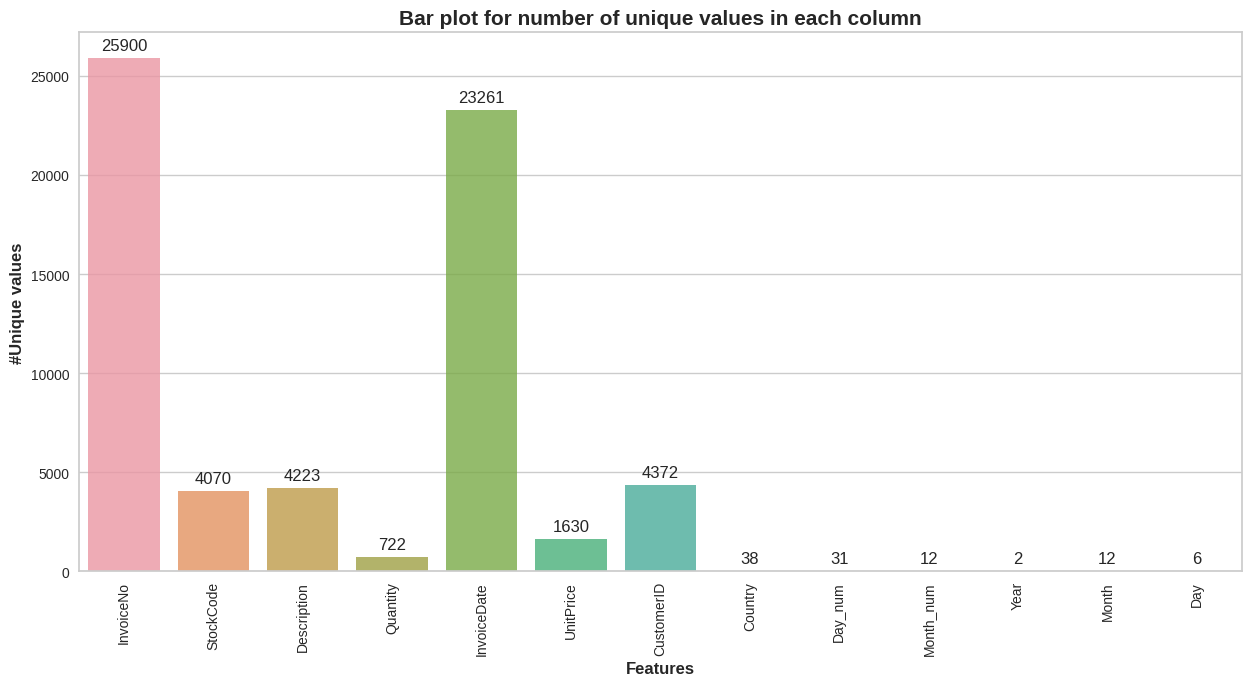

In [29]:
#Chart-1 visualization code
# Plotting bar plot for number of unique values in each column

unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**As we can see 'InvoiceNo' and 'InvoiceDate' have highest no. of unique values.**

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_num,Month_num,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,NaT,2.55,17850.0,United Kingdom,NaN,NaN,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.0,12.0,2010.0,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,December,Wednesday


#### Chart - 2 - Bar plot on customer distribution in 1 year time period

In [31]:
df['Year'] = df["InvoiceDate"].dt.year
df['Month'] = df["InvoiceDate"].dt.month


In [32]:
passenger_number=df.groupby(["Month","Year"])["CustomerID"].count().reset_index().sort_values(by="CustomerID" , ascending=False).rename(columns={"CustomerID":"Number of customers"})
passenger_number

,Month,Year,Number of customers
10,11.0,2011.0,64232
9,10.0,2011.0,49928
8,9.0,2011.0,40459
4,5.0,2011.0,28661
5,6.0,2011.0,27576
2,3.0,2011.0,27516
7,8.0,2011.0,27444
6,7.0,2011.0,27256
11,12.0,2010.0,26353
3,4.0,2011.0,22988


In [33]:
passenger_number['Year']

10    2011.0
9     2011.0
8     2011.0
4     2011.0
5     2011.0
2     2011.0
7     2011.0
6     2011.0
11    2010.0
3     2011.0
0     2011.0
1     2011.0
12    2011.0
Name: Year, dtype: float64

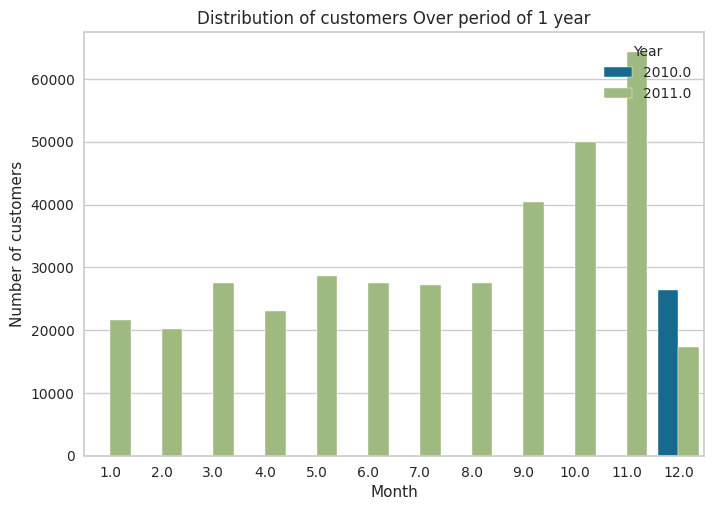

In [34]:
## customer distribution in 1 year time period
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10
sns.barplot(data=passenger_number , x="Month"  , y="Number of customers" , hue="Year").set(title = "Distribution of customers Over period of 1 year")
plt.show()

**1. Why did you pick the specific chart?**

A bar graph is used to compare data among categories.It also shows the counts of values for the different levels of a categorical or nominal variable.To visualise   the number of males and females who could pay all the credit bills duly,without any delay,I have used bar graph.

#####  **What is/are the insight(s) found from the chart?**

From the plot we can see that more number of custromers have transactioned in the month of November 2011 followed by 'October' and 'Septmber' of 2011. 

Least number of transactions has happened in the month of December 2011.

We can  see some transaction happened in the month of December 2010 .

#####  **Will the gained insights help creating a positive business impact?** 
**Are there any insights that lead to negative growth? Justify with specific reason.**

Yes,the gained insight will definetly help the online store to have knowldge on the months in which more tranactioned has happened and the months in which less transactions has happened,to dig out the reason behind the reason as to why there was less sales in many of the months.

#### Chart - 3 - Bar plot on the  countries and their Number of Transactions

[Text(0.5, 1.0, 'Plot of countries and their number of orders')]

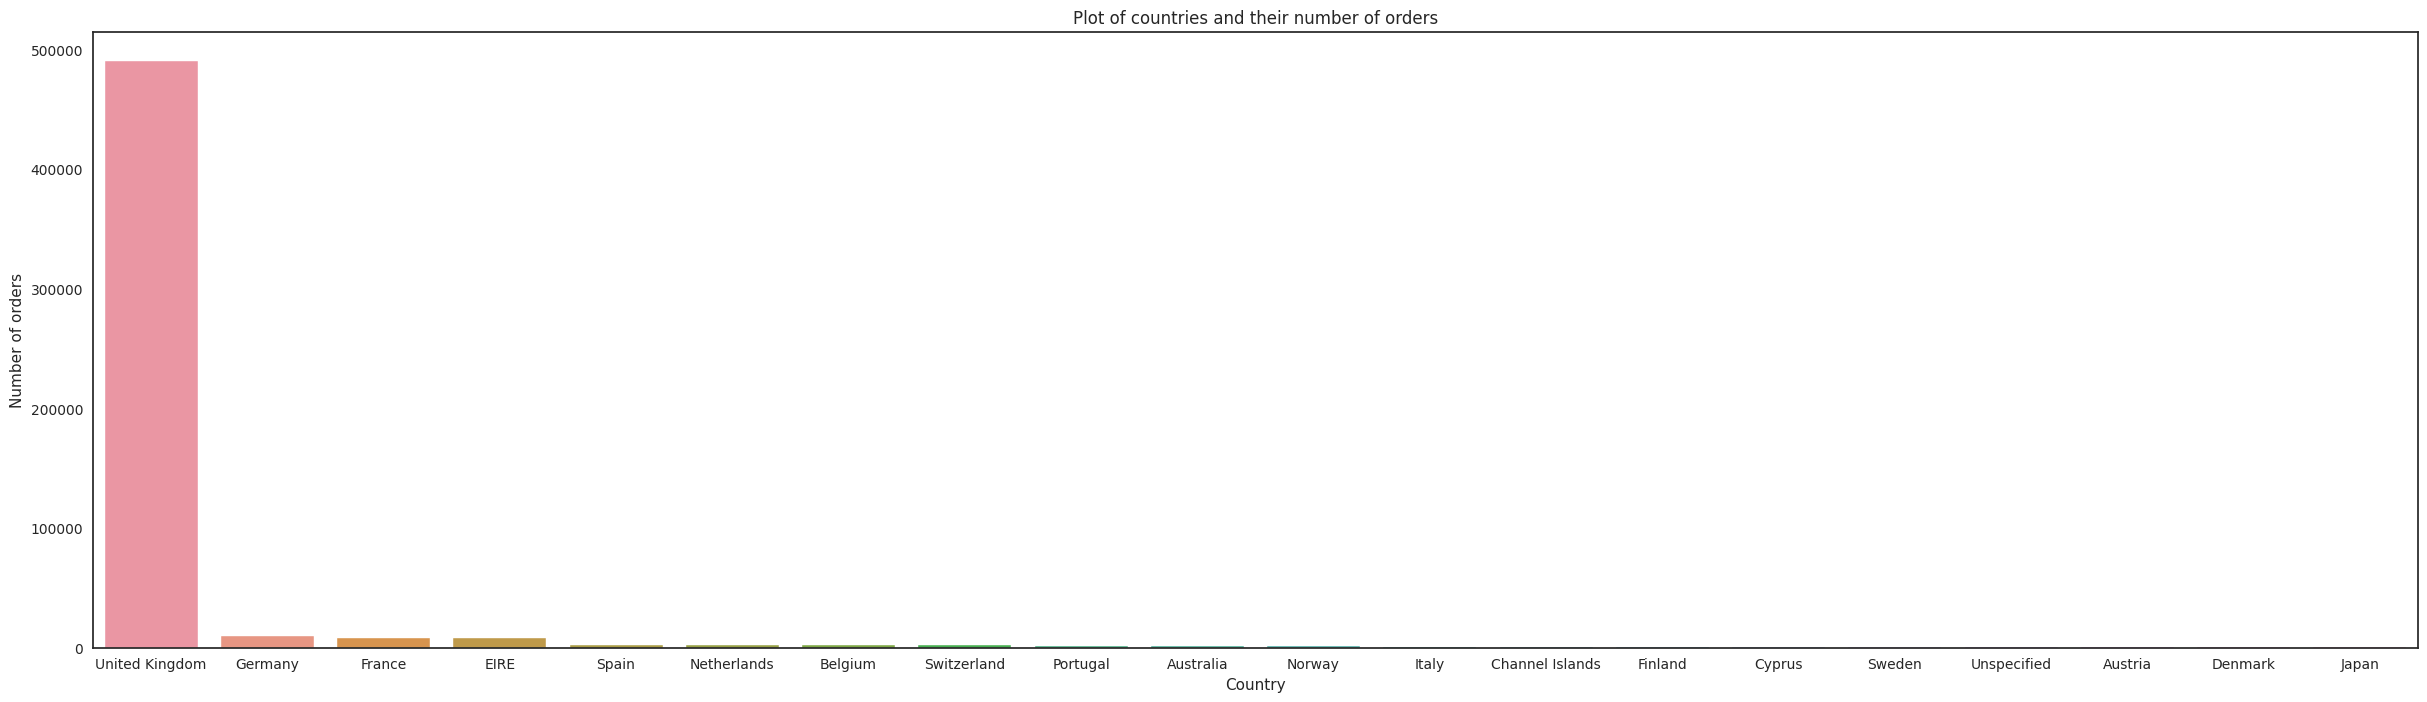

In [35]:
sns.set_style('white')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (30,8)
sns.barplot(data=top_ten.head(20), x="Country", y ="Number of orders" ).set(title = "Plot of countries and their number of orders")

**1. Why did you pick the specific chart?**

A bar graph is used to compare data among categories.It also shows the counts of values for the different levels of a categorical or nominal variable.To visualise   the number of males and females who could pay all the credit bills duly,without any delay,I have used bar graph.

##### **What is/are the insight(s) found from the chart?**

From the plot , it is evident that the country United Kingdom has the highest transaction percentage followed by Germany and France .The country Australia has very low transaction percentage. After Australia , the transaction  is almost zero

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

Definetly, from plot it helps to visualise the countries which are more transacting and countries which are not.This information will be very helpful for store to segment the countries accordingly and come up with ideas to improve their business.

#### Chart - 4 - Bar plot on Top ten customers who transacted(Univariate)

In [36]:
customer_df = df.copy()

In [37]:
customer_df['amount'] = customer_df.Quantity*customer_df.UnitPrice

In [38]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day_num,Month_num,Year,Month,Day,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,NaT,2.55,17850.0,United Kingdom,NaN,NaN,NaN,NaN,NaN,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,12.0,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.0,12.0,2010.0,12.0,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,12.0,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,12.0,Wednesday,20.34


In [39]:
#plotting the bar plot
PercentSales = customer_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)


,CustomerID,amount
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187322.17
3,14911.0,132458.73
4,12415.0,123725.45
5,14156.0,113214.59
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62690.54
9,15311.0,59284.19


<Axes: xlabel='CustomerID', ylabel='amount'>

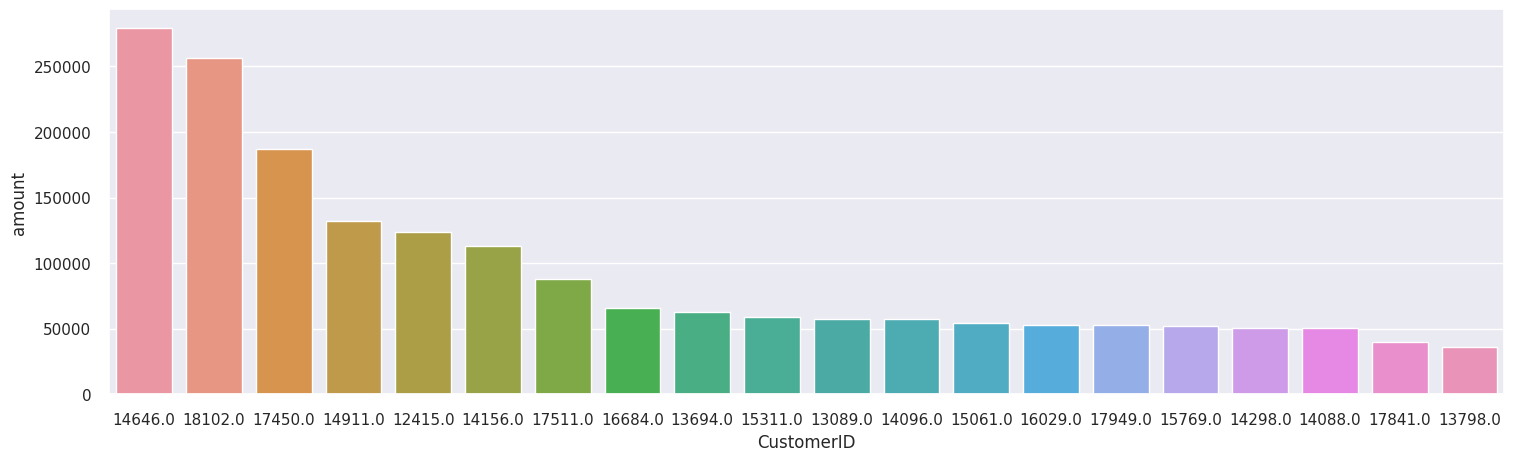

In [40]:
sns.set(rc={'figure.figsize':(18,5)})
plt.rcParams['font.size'] = 8
sns.barplot(x="CustomerID", y="amount", data=PercentSales, order=PercentSales['CustomerID'])

**1. Why did you pick the specific chart?**

A bar graph is used to compare data among categories.It also shows the counts of values for the different levels of a categorical or nominal variable.To visualise   the number of males and females who could pay all the credit bills duly,without any delay,I have used bar graph.

#####  **What is/are the insight(s) found from the chart?**

Most Amount is spent by customerID (14646.0) which is more than 250000 followed by customerID (18102.0) which is also more than 250000.

Least amount is spent by customer with id 13798 which is less than 50,000

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

Definetly, from plot it helps to visualise the customers who have  more transacting and customers wh0 are not.This information will be very helpful for store to segment the customers accordingly and come up with ideas to improve their business.

####Chart - 5 Bar plot on Top Products. 

In [41]:
# Plotting a graph for top 10 products
AmountSum = customer_df.groupby(["Description"]).amount.sum().reset_index().sort_values( by= "amount" , ascending = False)


In [42]:
AmountSum

,Description,amount
1098,DOTCOM POSTAGE,206245.480
2915,REGENCY CAKESTAND 3 TIER,164459.490
3918,WHITE HANGING HEART T-LIGHT HOLDER,99612.420
2471,PARTY BUNTING,98243.880
1866,JUMBO BAG RED RETROSPOT,92175.790
...,...,...
615,Bank Charges,-7175.639
934,CRUK Commission,-7933.430
281,Adjust bad debt,-11062.060
2246,Manual,-69031.640


<Axes: xlabel='Description', ylabel='amount'>

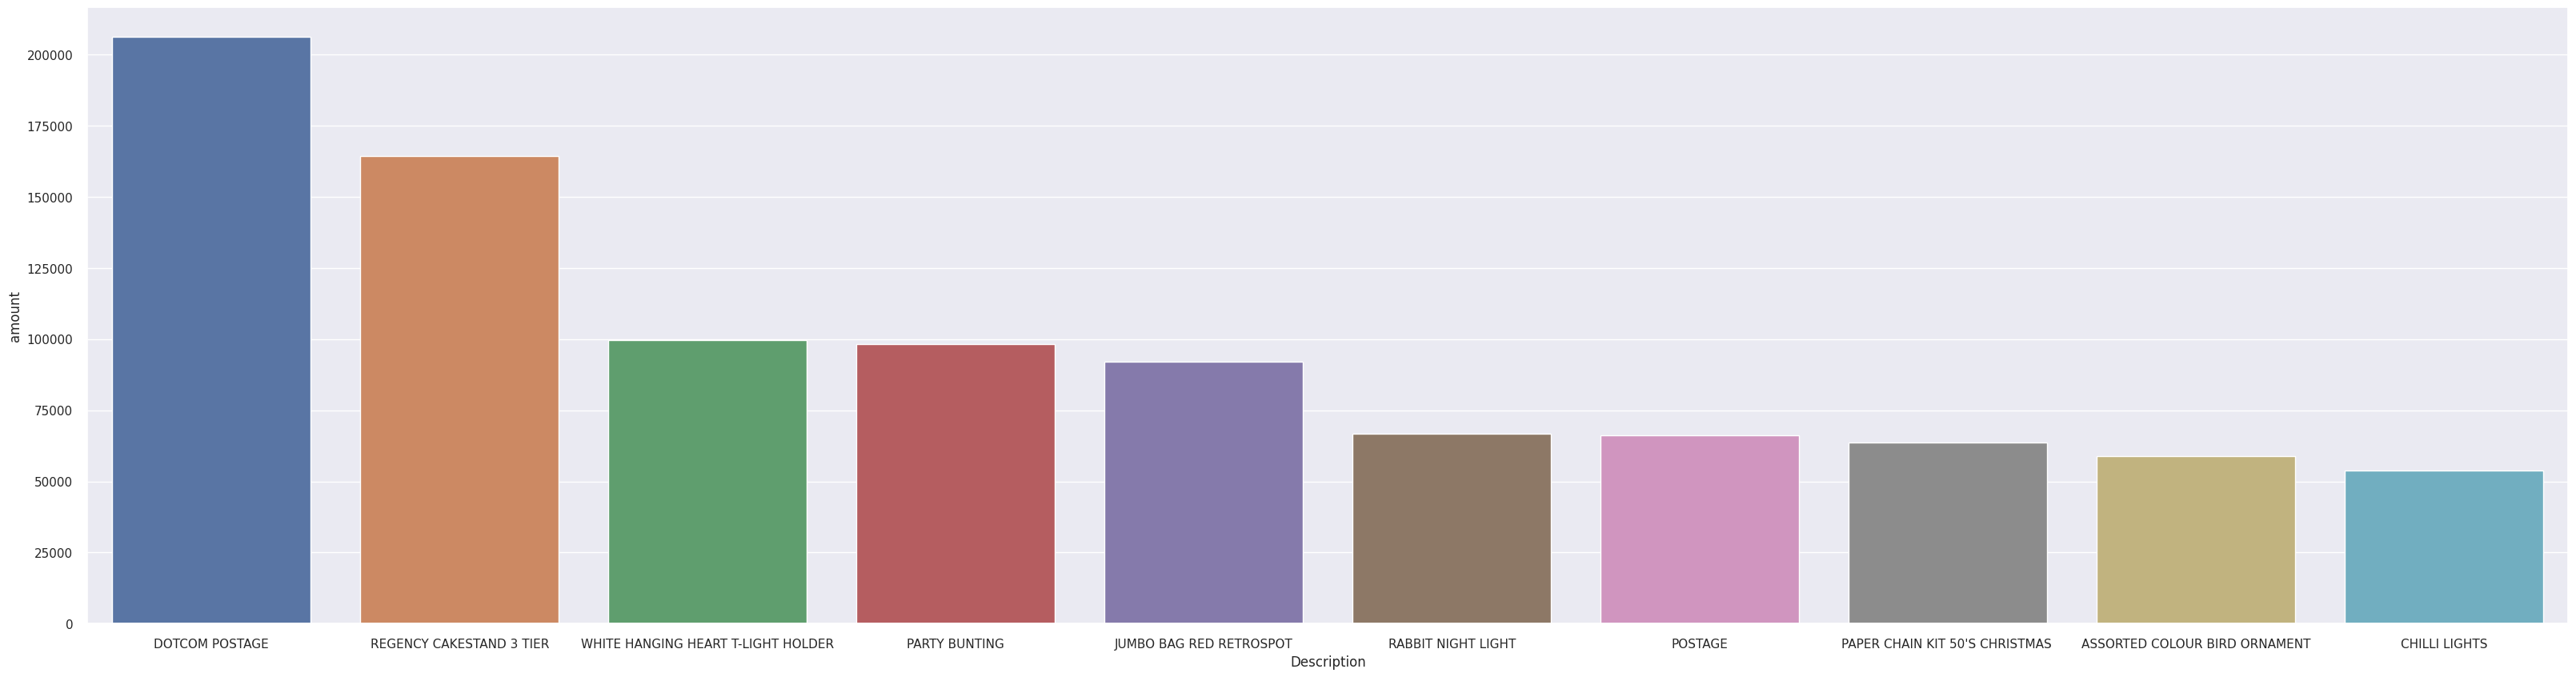

In [43]:
sns.set(rc={'figure.figsize':(40,10)})
plt.rcParams['font.size'] = 10
sns.barplot(x="Description", y="amount", data=AmountSum.head(10))

**1. Why did you pick the specific chart?**

A bar graph is used to compare data among categories.It also shows the counts of values for the different levels of a categorical or nominal variable.To visualise   the number of males and females who could pay all the credit bills duly,without any delay,I have used bar graph.

#####  **What is/are the insight(s) found from the chart?**

From the plot , we can see that the most common product which is sold is "Dotcom Postage", the second highest beign '**Regency CakeStand 3 Tier**' followed by '**White Hanging Heart T-Light Holder**' where as the least popular product which is not sold is "Chilli Lights"**



**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**


**This gained insight will definetly help the store representatives can get an idea of what all products are getting sold at a fater rate and the products which are not getting sold.This will  help in improving the quality of the products and upselling them.**

#### Chart - 6 - Point plot of countries with cancellation order

In [44]:
country_cancel.head(10)


,Country,Number of canceled orders
29,United Kingdom,7821
12,Germany,453
8,EIRE,301
11,France,148
28,USA,112
0,Australia,74
25,Spain,48
16,Italy,45
3,Belgium,38
17,Japan,37


[Text(0.5, 1.0, 'Country v/s Number of orders cancelled')]

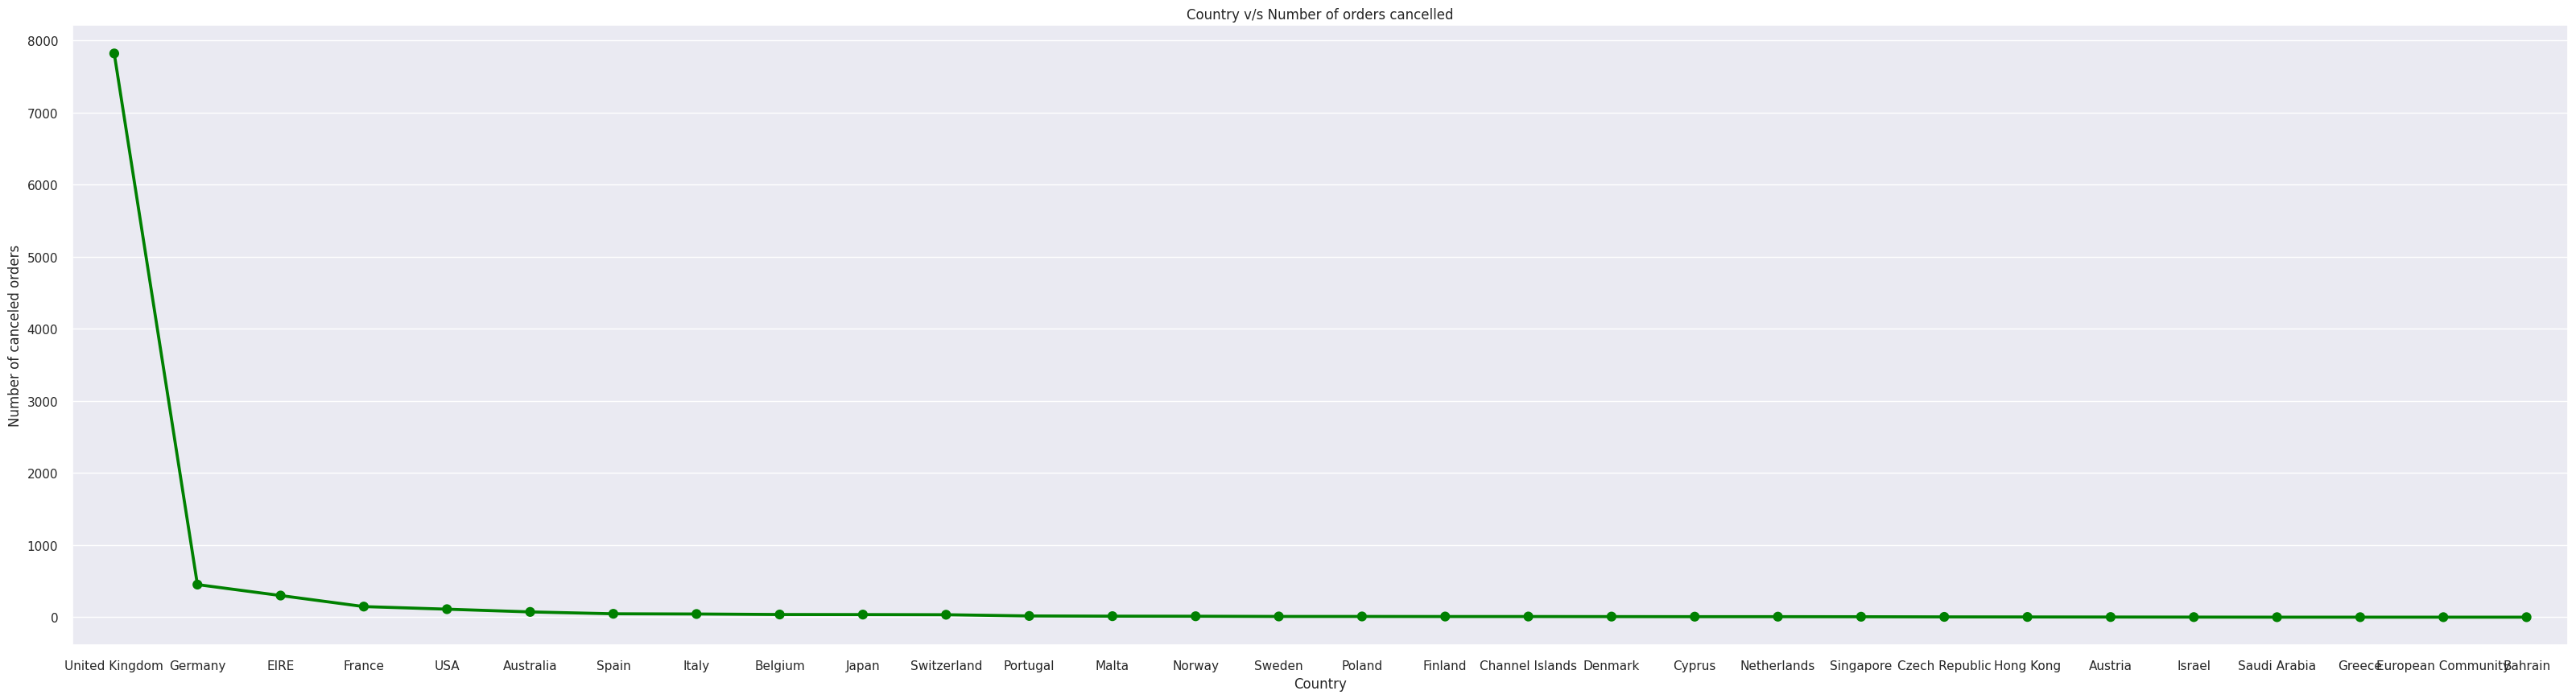

In [45]:
sns.set(rc={'figure.figsize':(40,10)})
plt.rcParams['font.size'] = 10
sns.pointplot(data = country_cancel , x="Country" , y="Number of canceled orders" , color="green").set(title="Country v/s Number of orders cancelled")

##### **1. Why did you pick the specific chart?**

Points plots are very usefull in focusing  and explaining on the different levels of comparison of two variables.I used point plot to analyse the contries who cancel their orders from the store.

##### **2. What is/are the insight(s) found from the chart?**

From the plot it is evident that maximum orders were cancelled by the country 'United Kingdom' followed by'Germany' and 'Eire'

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

This information will be very helpful for store to segment the countries accordingly and come up with ideas to improve their business.

#### **Chart 7 - Pie chart on the number of cancellations for products**

In [46]:
#Claculating which product has the most number of cancellations.
item_cancellation_data = canceled_order['Description'].value_counts().reset_index().head(10)
item_cancellation_data

,index,Description
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,180
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77
5,SET OF 3 CAKE TINS PANTRY DESIGN,73
6,SAMPLES,60
7,ROSES REGENCY TEACUP AND SAUCER,54
8,STRAWBERRY CERAMIC TRINKET BOX,54
9,RECIPE BOX PANTRY YELLOW DESIGN,47


Text(0.5, 1.0, 'Products with most number of cancellations.')

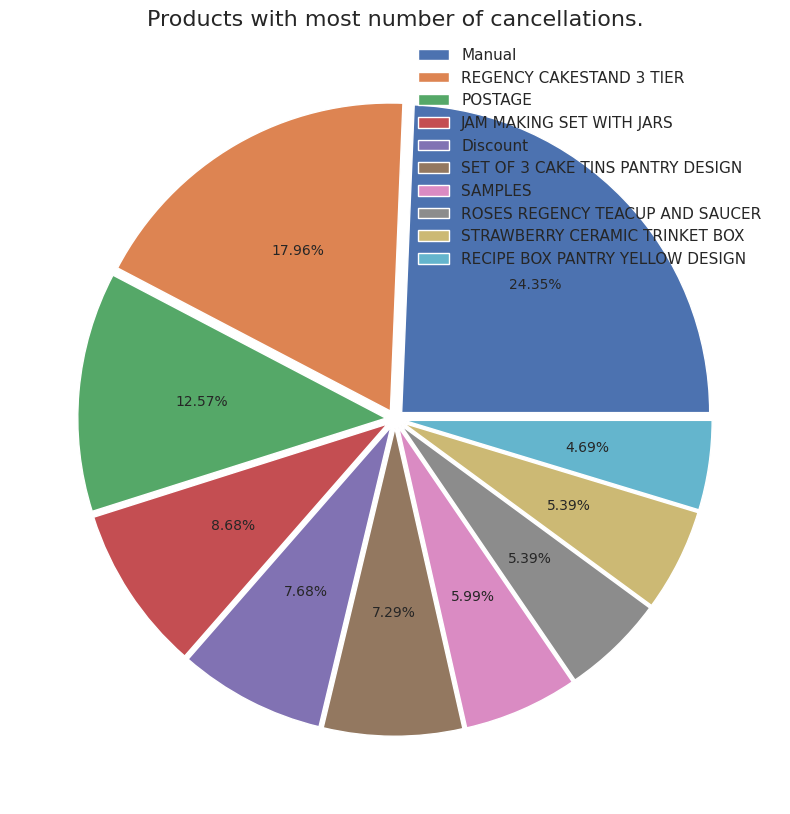

In [47]:
# Plotting the no. of cancellations for products using a pie chart.
plt.figure(figsize=(10,10))
labels=item_cancellation_data['index']                                                    

explode=[0.03]*len(item_cancellation_data.index)                                          
plt.pie(item_cancellation_data['Description'],explode = explode ,autopct='%1.2f%%')       
plt.legend(labels, loc='best')                                                               

# Setting the title.
plt.title('Products with most number of cancellations.', fontsize=16)

#####**1. Why did you pick the specific chart?**

A pie chart expresses a part-to-whole relationship in your data.Each slice represents one component and all slices added together equal the whole.It becomes easy to visualize data with pie charts and each slice can be analysed easily.I used pie chart to anlyse number of different products getting cancelled.


##### **2. What is/are the insight(s) found from the chart?**

From the plot we can see that maximum product getting cancelled is 'Manual'  followed by 'REGENCY CAKESTAND 3 TIER' and 'Postage'.The least product getting cancelled is 'RECIPE BOX PANTRY YELLOW DESIGN'.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason**.

Definetly, From the gained insight we can know what all products are getting cancelled.The reson behind this could be unearthed and come up up with strategies to improve sales of the product. 

##### What is/are the insight(s) found from the chart?

We can clearly say from the above graph that the winter months have the highest sales with November and October having the highest and second highest sales respectively.

#### Chart - 8 - Heatmap of data

<Axes: >

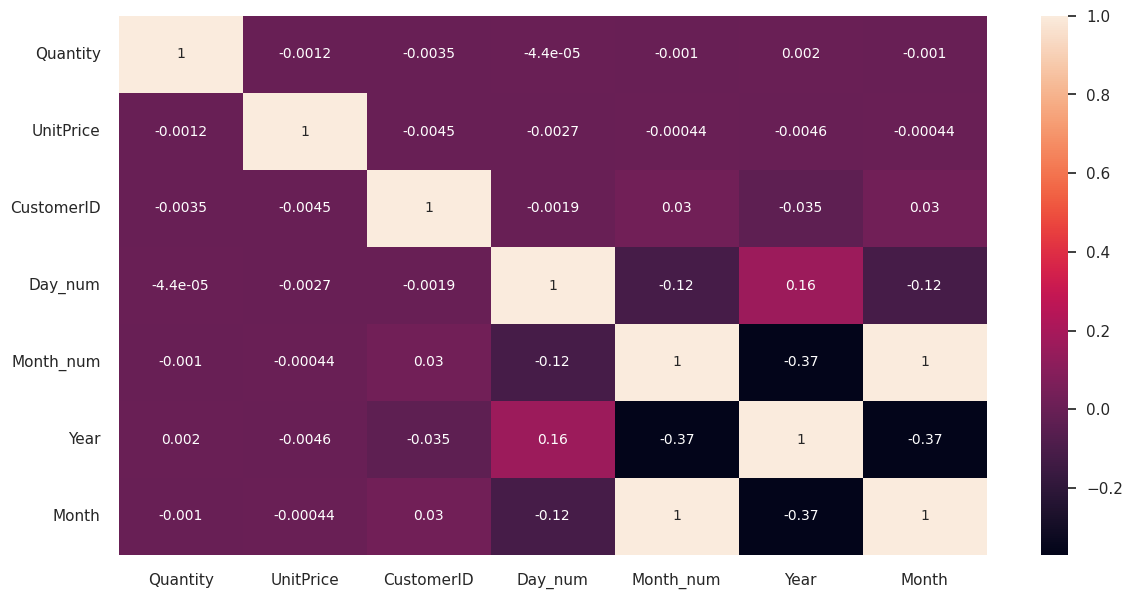

In [48]:
# Checking for correlation in our data.
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)

##### **1. Why did you pick the specific chart?**

Heat Maps are graphical representations of data that utilize color-coded systems where values are depicted by color.It represents the coefficients to visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building.It transforms the correlation matrix into color coding .Each cell in the heatmap shows the corelation  between two variables.The corelation values varies from the range [-1,1]

##### **What is/are the insight(s) found from the chart?**

From the plot we can see that most of the variables are not related to each other.

## ***5. Feature Engineering & Data Pre-processing***

In [49]:
# Creating a copy of the dataset for further feature engineering
df=df.copy()

### 1. Handling Missing Values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         1
UnitPrice           0
CustomerID     135037
Country             0
Day_num             1
Month_num           1
Year                1
Month               1
Day                 1
dtype: int64


<Axes: >

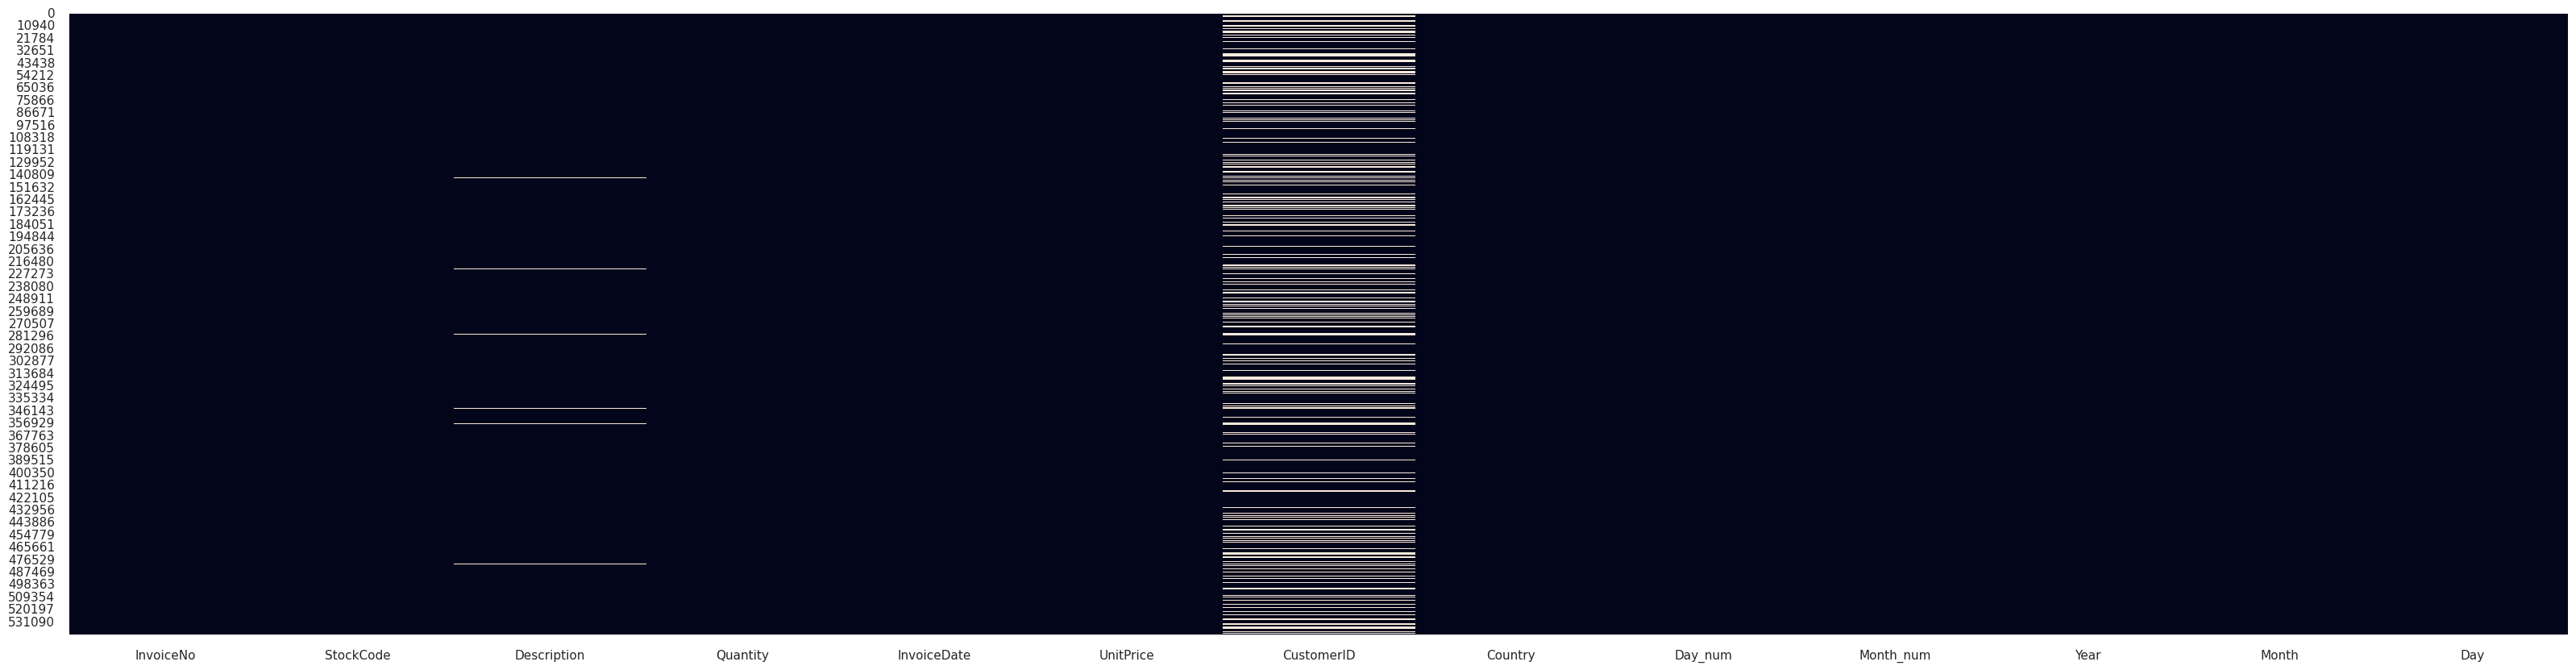

In [50]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

As we can see that there are some null values in description column and quite a lot of null values in our CustomerId column. We need to deal with these null values otherwise they will have an adverse impact on our modelling process. And seeing as our goal is to customer segmentation, we can't just impute values for customerId. So we will have to drop these null values.

In [51]:
df.dropna(inplace=True)

##***6. Create The RFM model (Recency, Frequency & Monetary value)***



**RFM stands for recency, frequency, monetary value. These parameters are usually used to give us an idea of who our best customers are and customers who we are at risk of losing.**

Recency: How recently a customer has made a purchase.

Frequency: How often a customer makes a purchase.

Monetary Value: How much money a customer spends on

**Performing RFM Segmentation and RFM Analysis, Step by Step**


The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ... The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).


###**Recency**

To create a Recency feature variable, we need to decide the reference date for analysis and we will define the reference date as one day after the last transaction.

In [52]:
ref_date = df.InvoiceDate.max()

#timedelta function returns to total number of seconds
ref_date = ref_date + datetime.timedelta(days=1)

print(df.InvoiceDate.max(), df.InvoiceDate.min())
ref_date

2011-12-09 12:50:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:50:00')

#### **Recency**

We will construct a reference variable as number of days after the reference date when a customer last made a purchase.

In [53]:
df['days_since_last_purchase'] = ref_date- df.InvoiceDate
df['days_since_last_purchase_num'] = df['days_since_last_purchase'].astype('timedelta64[D]')
df['days_since_last_purchase_num'].head() 

1    374.0
2    374.0
3    374.0
4    374.0
5    374.0
Name: days_since_last_purchase_num, dtype: float64

In [54]:
customer_history_df = df.groupby('CustomerID')['days_since_last_purchase_num'].min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
customer_history_df.head()

,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


In [55]:
customer_history_df.describe()

,CustomerID,Recency
count,4372.000000,4372.000000
mean,15299.677722,92.047118
std,1722.390705,100.765435
min,12346.000000,1.000000
25%,13812.750000,17.000000
50%,15300.500000,50.000000
75%,16778.250000,143.000000
max,18287.000000,374.000000


####**Monetary**


Monetary value refers to how much a customer spends on each transaction, and is usually measured by summing up the total value of their transactions.

In [56]:
df['Monetary'] = df['Quantity']*df['UnitPrice']

In [57]:
customer_monetary_val = df[['CustomerID','Monetary']].groupby('CustomerID').sum().reset_index()
customer_monetary_val.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [58]:
customer_history_df=customer_history_df.merge(customer_monetary_val,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary
0,12346.0,326.0,0.00
1,12347.0,2.0,4310.00
2,12348.0,75.0,1797.24
3,12349.0,19.0,1757.55
4,12350.0,310.0,334.40


###**Frequency**


Frequency refers to how often a customer makes a purchase, and is usually measured by counting the number of transactions they have made.

In [59]:
customer_freq = df[['CustomerID','Monetary']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Monetary':'Frequency'},inplace=True)
customer_freq.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [60]:
customer_history_df=customer_history_df.merge(customer_freq,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326.0,0.00,2
1,12347.0,2.0,4310.00,182
2,12348.0,75.0,1797.24,31
3,12349.0,19.0,1757.55,73
4,12350.0,310.0,334.40,17


In [61]:
customer_history_df

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326.0,0.00,2
1,12347.0,2.0,4310.00,182
2,12348.0,75.0,1797.24,31
3,12349.0,19.0,1757.55,73
4,12350.0,310.0,334.40,17
...,...,...,...,...
4367,18280.0,278.0,180.60,10
4368,18281.0,181.0,80.82,7
4369,18282.0,8.0,176.60,13
4370,18283.0,4.0,2045.53,721




##***8. Checking outliers by plotting Box Plot for R-F-M (Recency, Frequency & Monetary).***

Text(0.5, 0, 'Attribute - Recency')

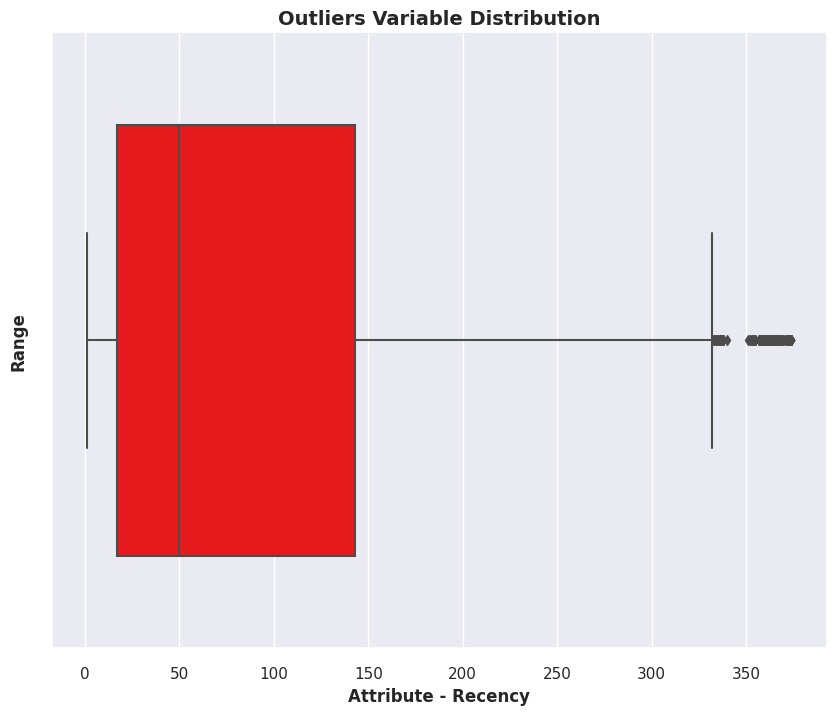

In [62]:
# Box plot of Recency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Recency'] , orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Recency", fontweight = 'bold')

Text(0.5, 0, 'Attribute - Monetary')

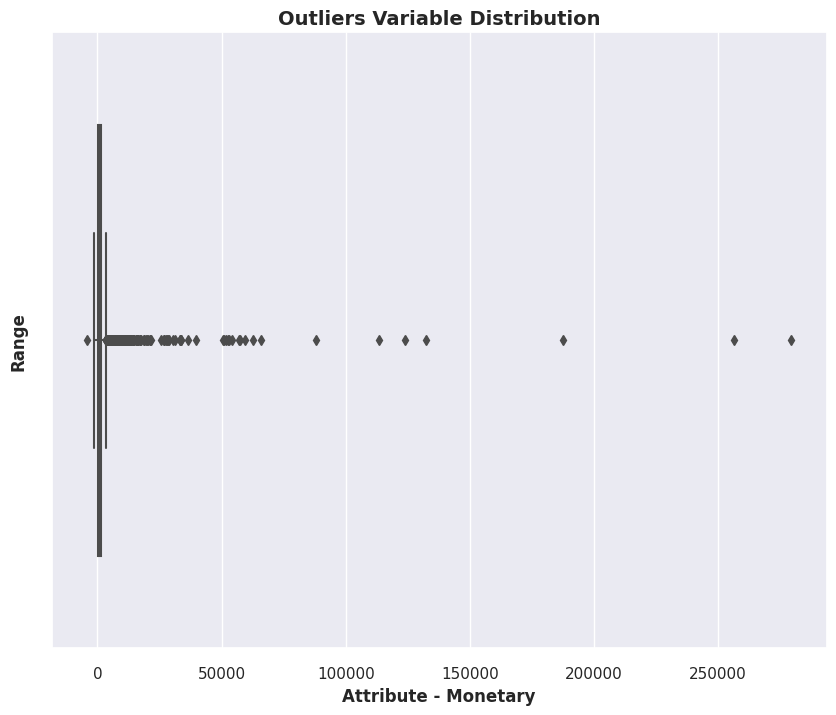

In [63]:
# Box plot of Monetary
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Monetary'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Monetary", fontweight = 'bold')

Text(0.5, 0, 'Attribute - Frequency')

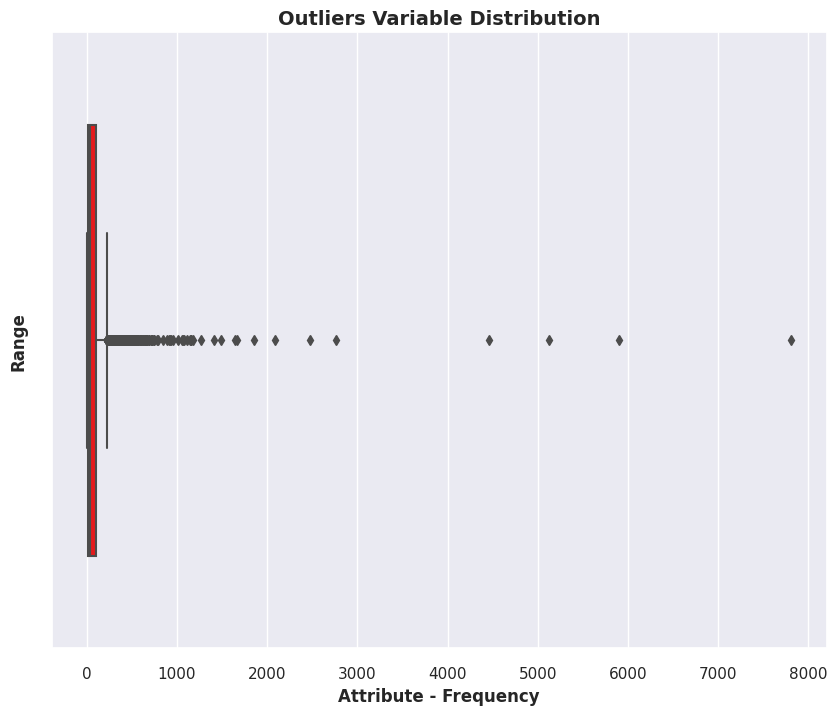

In [64]:
# Box plot of Frequency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Frequency'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Frequency", fontweight = 'bold')

**Removing Outliers by using IQR process**


In [65]:
# removing  outliers for 'Monetary' column
Q1 = customer_history_df.Monetary.quantile(0.05)
Q3 = customer_history_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Monetary >= Q1 - 1.5*IQR) & (customer_history_df.Monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = customer_history_df.Recency.quantile(0.05)
Q3 = customer_history_df.Recency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Recency >= Q1 - 1.5*IQR) & (customer_history_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = customer_history_df.Frequency.quantile(0.25)
Q3 = customer_history_df.Frequency.quantile(0.75)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Frequency >= Q1 - 1.5*IQR) & (customer_history_df.Frequency <= Q3 + 1.5*IQR)]

###  Data Scaling

In [66]:
# Scaling
rfm_df = customer_history_df[['Monetary', 'Frequency', 'Recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(3950, 3)

In [67]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,-0.768293,-1.024444,2.206309
1,2.601010,2.599733,-0.954689
2,0.636683,-0.440549,-0.242489
3,0.605655,0.405092,-0.788834
4,-0.506879,-0.722430,2.050211


##### Which method have you used to scale you data and why?

When we are using an algorithm that assumes our features have a similar range, we should use feature scaling.

If the ranges of your features differ much then you should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Since the data set has a range of values , I have used Standard scalar for standardization.When we use standardization each feature will be converted to have  have zero-mean, unit standard-deviation



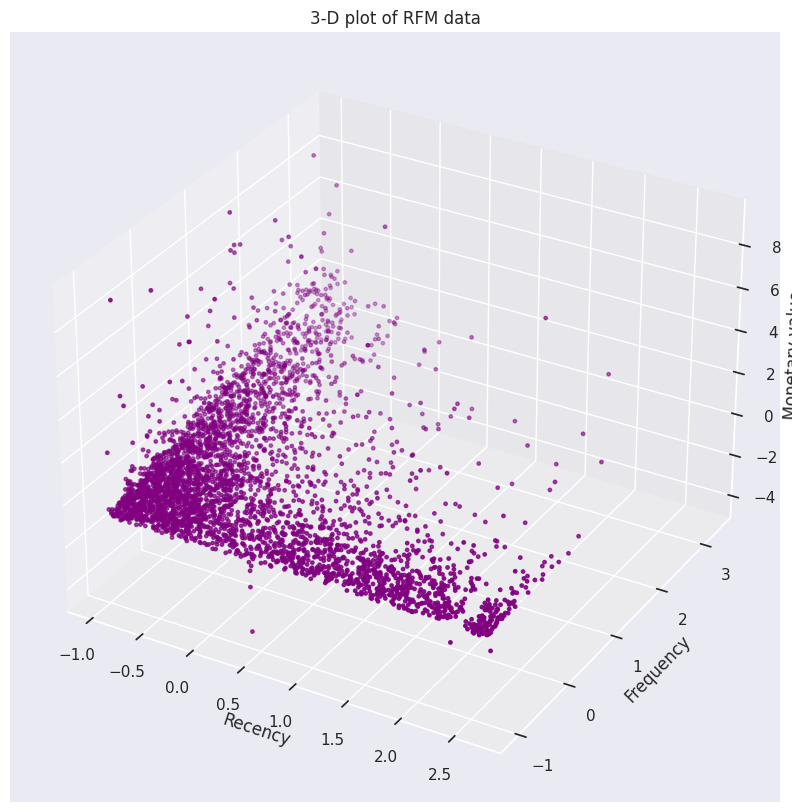

In [68]:
# Importing Library for 3D plot
from mpl_toolkits.mplot3d import Axes3D

# set fig size
fig=plt.figure(figsize=(12,10))

# syntax for 3-D plotting
ax=fig.add_subplot(111,projection='3d')

# syntax for plotting
xaxis = rfm_df_scaled.Recency
yaxis = rfm_df_scaled.Frequency
zaxis = rfm_df_scaled.Monetary
ax.scatter(xaxis,yaxis,zaxis,s=6, color='purple') 

# set x, y & z label
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
ax.set_title("3-D plot of RFM data")

# show the plot
plt.show()

## ***9. ML Model Implementation***

### ML Model - 1 - **Implementing K Means Clustering**

**K-means is a popular clustering algorithm that partitions a dataset into k distinct clusters based on the similarity of data points. It iteratively assigns data points to the nearest centroid and updates the centroids until convergence, aiming to minimize the within-cluster sum of squared distances.**

**Silhouette analysis on K-Means Clustering-**

Silhouette analysis can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Let's see below how our data perform for each K clusters groups (3, 5 and 7) in the silhouette score of each cluster, along with the center of each of the cluster discovered in the scatter plots, by amount_log vs recency_log and vs frequency_log.

**Silhouette Analysis**

**silhouette score** = (p-q)/max(p,q)

**p** is the mean distance to the points in the nearest cluster that the data point is not a part of

**q** is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

Score closer to 1 indicates that the data point is very similar to other data points in the cluster,

Score closer to -1 indicates that the data point is not similar to the data points in its cluster.


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=3))

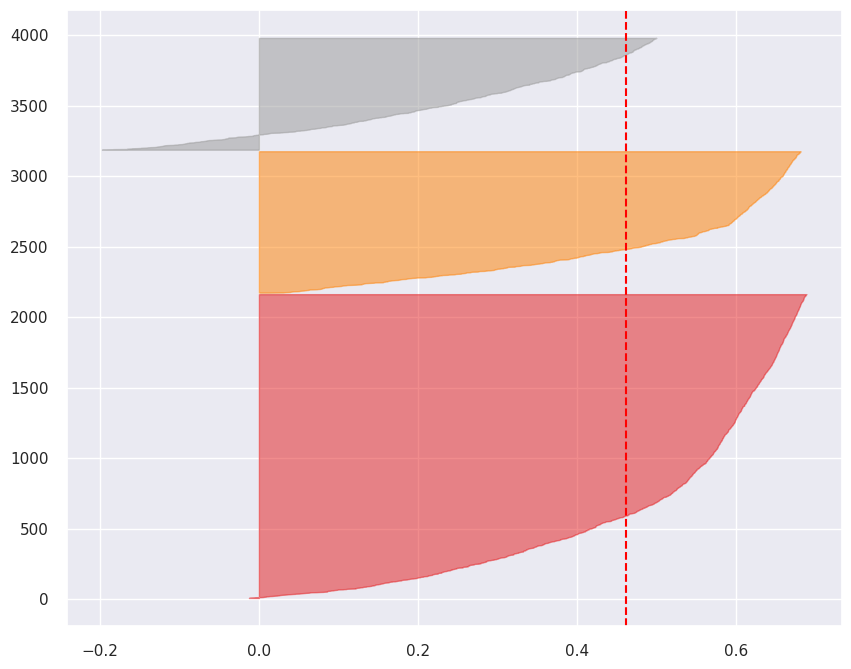

In [69]:
silhouette_model = SilhouetteVisualizer(KMeans(3))
silhouette_model.fit(rfm_df_scaled)

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=4))

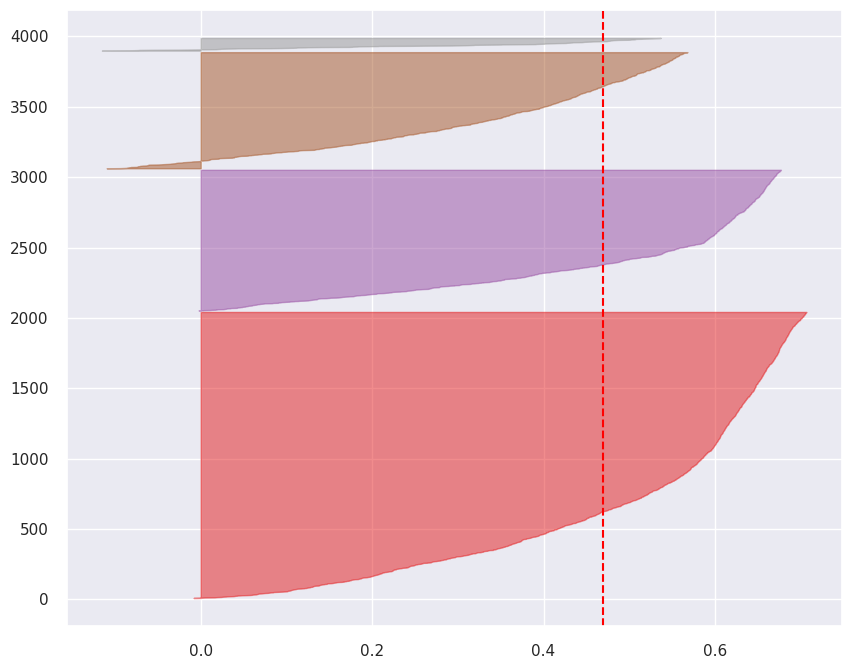

In [70]:
silhouette_model = SilhouetteVisualizer(KMeans(4))
silhouette_model.fit(rfm_df_scaled)

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=5))

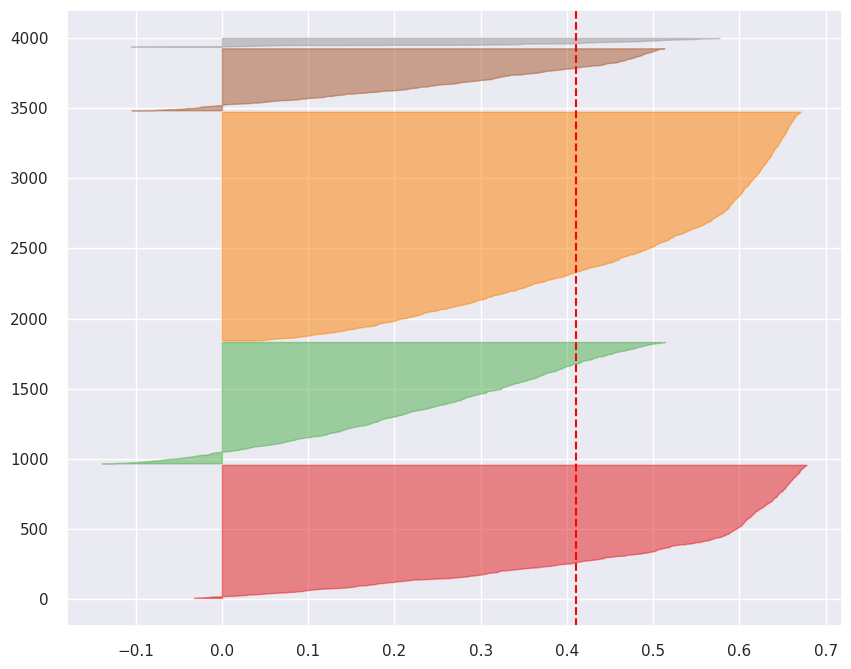

In [71]:
silhouette_model = SilhouetteVisualizer(KMeans(5))
silhouette_model.fit(rfm_df_scaled)

#### **Finding best value for K**


A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered.

**The Elbow Method**


Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.




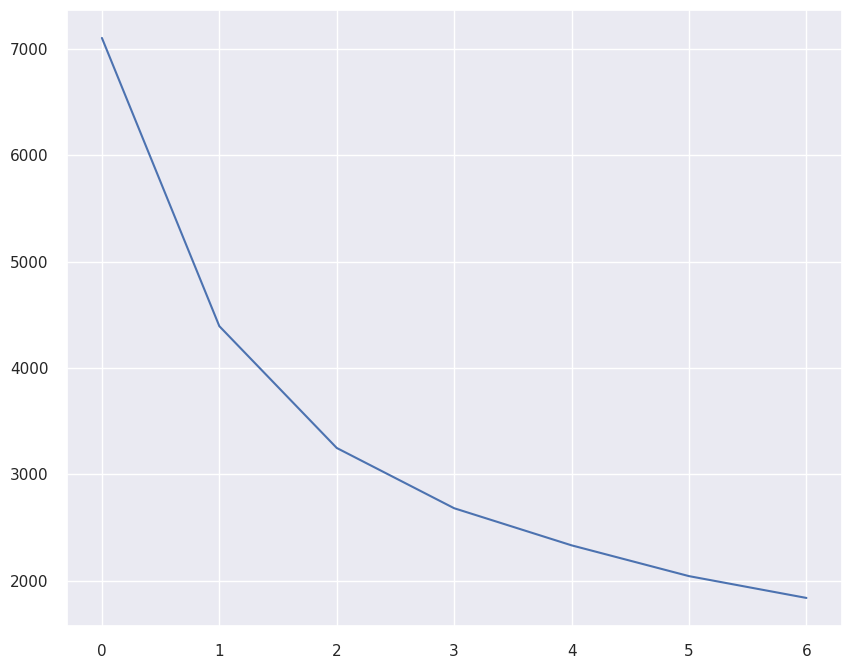

In [72]:
# elbow-curve/SSD
elbow_curve = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8] 
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    elbow_curve.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(elbow_curve)
#plt.



**From the above plot, we can see that the optimal number of clusters is 3 or 4.**

**Also It seems that we get a more detailed distribution of our customer base using k=3. However, this may not be a very visually appealing method to extract insights.**


In [73]:
# silhouette analysis
i = [2, 3, 4, 5, 6, 7, 8]

for k in i:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

For n_clusters=2, the silhouette score is 0.449000535293752
For n_clusters=3, the silhouette score is 0.46202851965981123
For n_clusters=4, the silhouette score is 0.4699916898525086
For n_clusters=5, the silhouette score is 0.40853361119390613
For n_clusters=6, the silhouette score is 0.37085290704769003
For n_clusters=7, the silhouette score is 0.3563677572001191
For n_clusters=8, the silhouette score is 0.3504990491581738


The silhouette score for "k=3" clusters is the highest which is 0.44 among all other k values.Also considering the elbow curve we can say k=3 is optimum number of clusters.

In [74]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
y_kmeans=kmeans.fit(rfm_df_scaled)

In [75]:
y_kmeans

KMeans(max_iter=50, n_clusters=3)

In [76]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0], dtype=int32)

In [77]:
# assign the label
customer_history_df['cluster_id'] = kmeans.labels_
customer_history_df.head()


,CustomerID,Recency,Monetary,Frequency,cluster_id
0,12346.0,326.0,0.00,2,1
1,12347.0,2.0,4310.00,182,2
2,12348.0,75.0,1797.24,31,0
3,12349.0,19.0,1757.55,73,0
4,12350.0,310.0,334.40,17,1


####**Creating Box Plot for R-M-F with respect to Cluster_id.**

<Axes: xlabel='cluster_id', ylabel='Recency'>

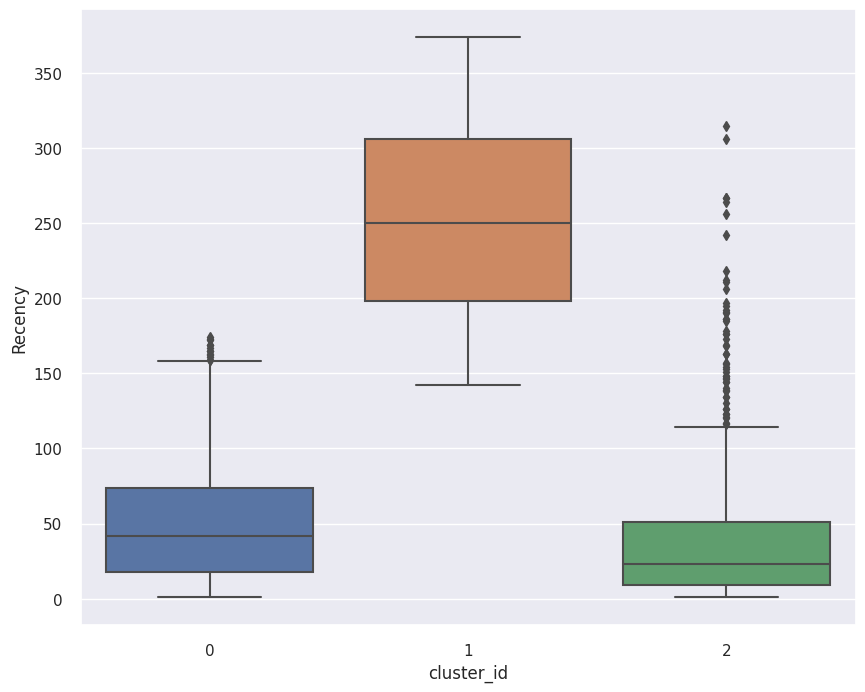

In [78]:
# plot
sns.boxplot(x='cluster_id', y='Recency', data=customer_history_df)

<Axes: xlabel='cluster_id', ylabel='Monetary'>

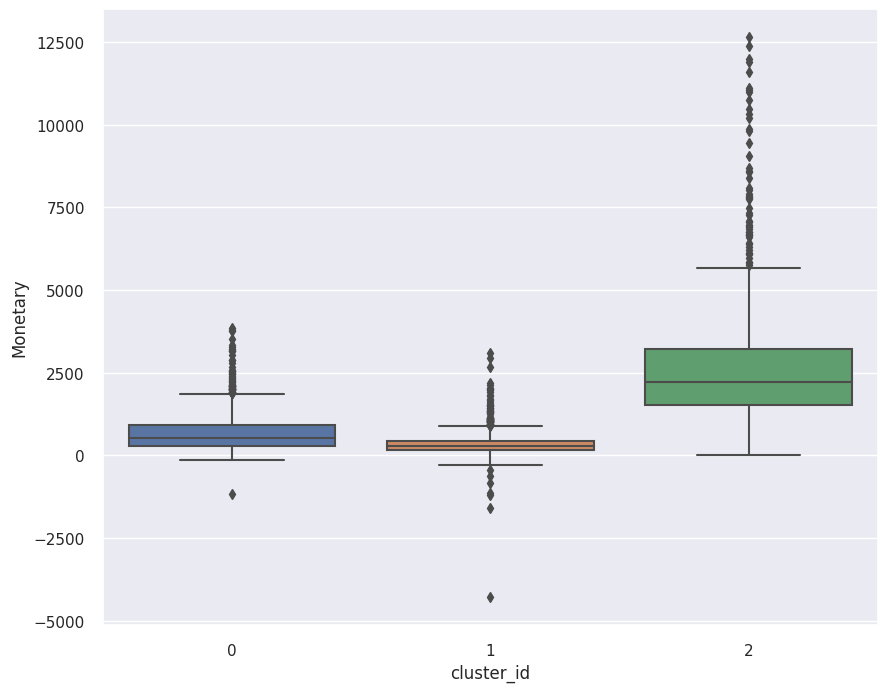

In [79]:
# plot
sns.boxplot(x='cluster_id', y='Monetary', data=customer_history_df)

<Axes: xlabel='cluster_id', ylabel='Frequency'>

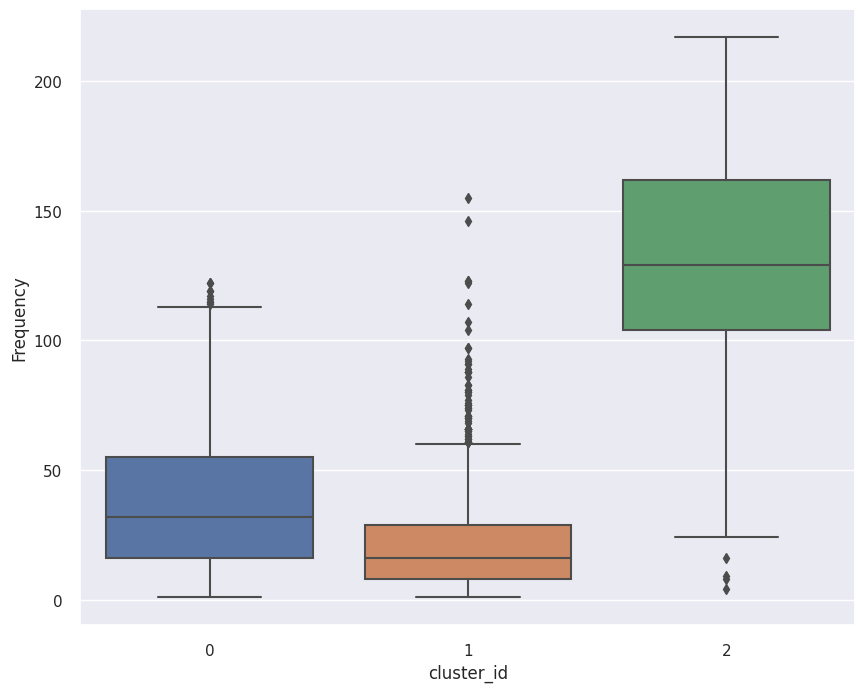

In [80]:
# plot
sns.boxplot(x='cluster_id', y='Frequency', data=customer_history_df)

###ML Model - 2 - **Implementing Hierarchial Clustering**

**Hierarchical clustering is a clustering algorithm that creates a hierarchy of clusters by iteratively merging or splitting them based on their similarity. It starts with each data point as a separate cluster and combines clusters recursively until reaching a desired number or hierarchy. It does not require a predefined number of clusters.**

#### **Hierarchical Clustering**

In [81]:
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,-0.768293,-1.024444,2.206309
1,2.601010,2.599733,-0.954689
2,0.636683,-0.440549,-0.242489
3,0.605655,0.405092,-0.788834
4,-0.506879,-0.722430,2.050211


In [82]:
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency,cluster_id
0,12346.0,326.0,0.00,2,1
1,12347.0,2.0,4310.00,182,2
2,12348.0,75.0,1797.24,31,0
3,12349.0,19.0,1757.55,73,0
4,12350.0,310.0,334.40,17,1


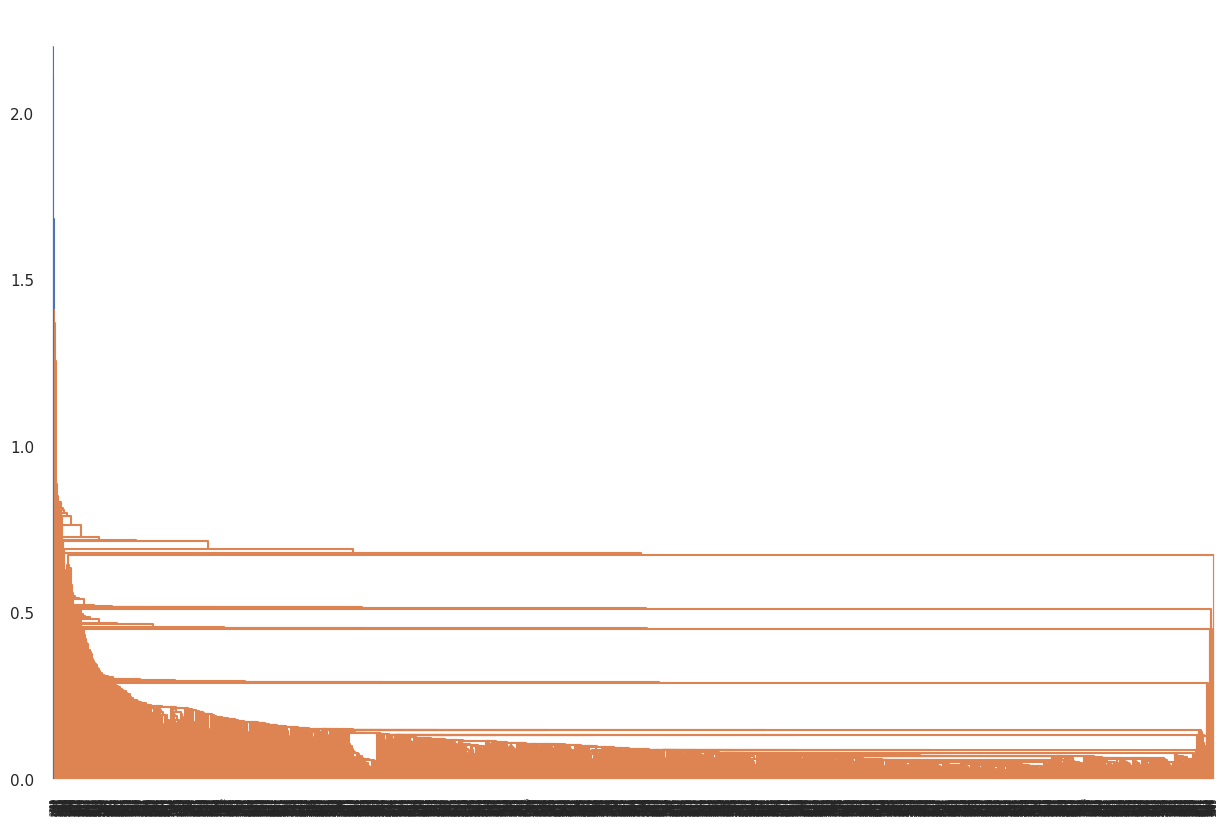

In [83]:
#Generates a dendrogram visualization for the hierarchical clustering of the scaled RFM data.
#Single Linkage:- it considers the minimum distance between any two points in different clusters
import sys
sys.setrecursionlimit(5000)

plt.figure(figsize=(15,10))
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()


###ML Model - 2 - **Implementing Hierarchial Clustering**

**Hierarchical clustering is a clustering algorithm that creates a hierarchy of clusters by iteratively merging or splitting them based on their similarity. It starts with each data point as a separate cluster and combines clusters recursively until reaching a desired number or hierarchy. It does not require a predefined number of clusters.**

#### **Hierarchical Clustering**

In [84]:
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,-0.768293,-1.024444,2.206309
1,2.601010,2.599733,-0.954689
2,0.636683,-0.440549,-0.242489
3,0.605655,0.405092,-0.788834
4,-0.506879,-0.722430,2.050211


In [85]:
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency,cluster_id
0,12346.0,326.0,0.00,2,1
1,12347.0,2.0,4310.00,182,2
2,12348.0,75.0,1797.24,31,0
3,12349.0,19.0,1757.55,73,0
4,12350.0,310.0,334.40,17,1


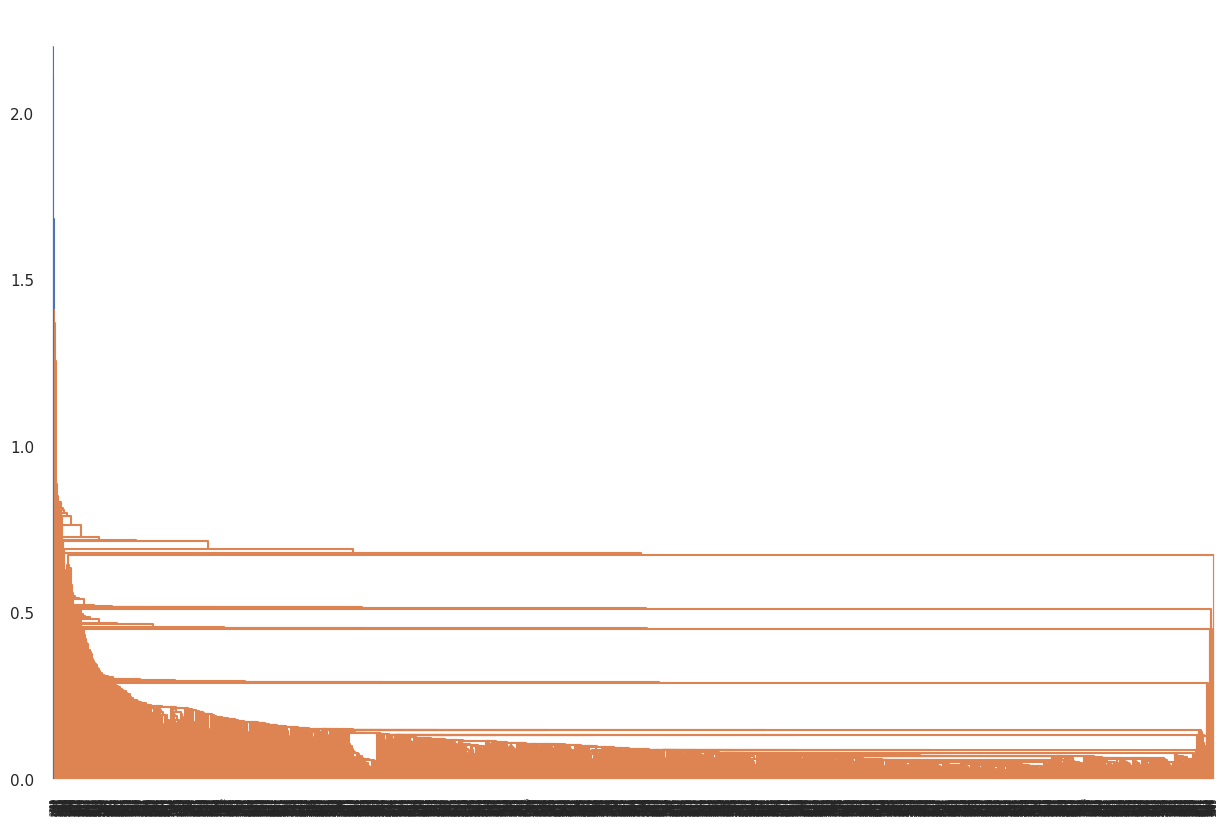

In [86]:
#Generates a dendrogram visualization for the hierarchical clustering of the scaled RFM data.
#Single Linkage:- it considers the minimum distance between any two points in different clusters
import sys
sys.setrecursionlimit(5000)

plt.figure(figsize=(15,10))
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()


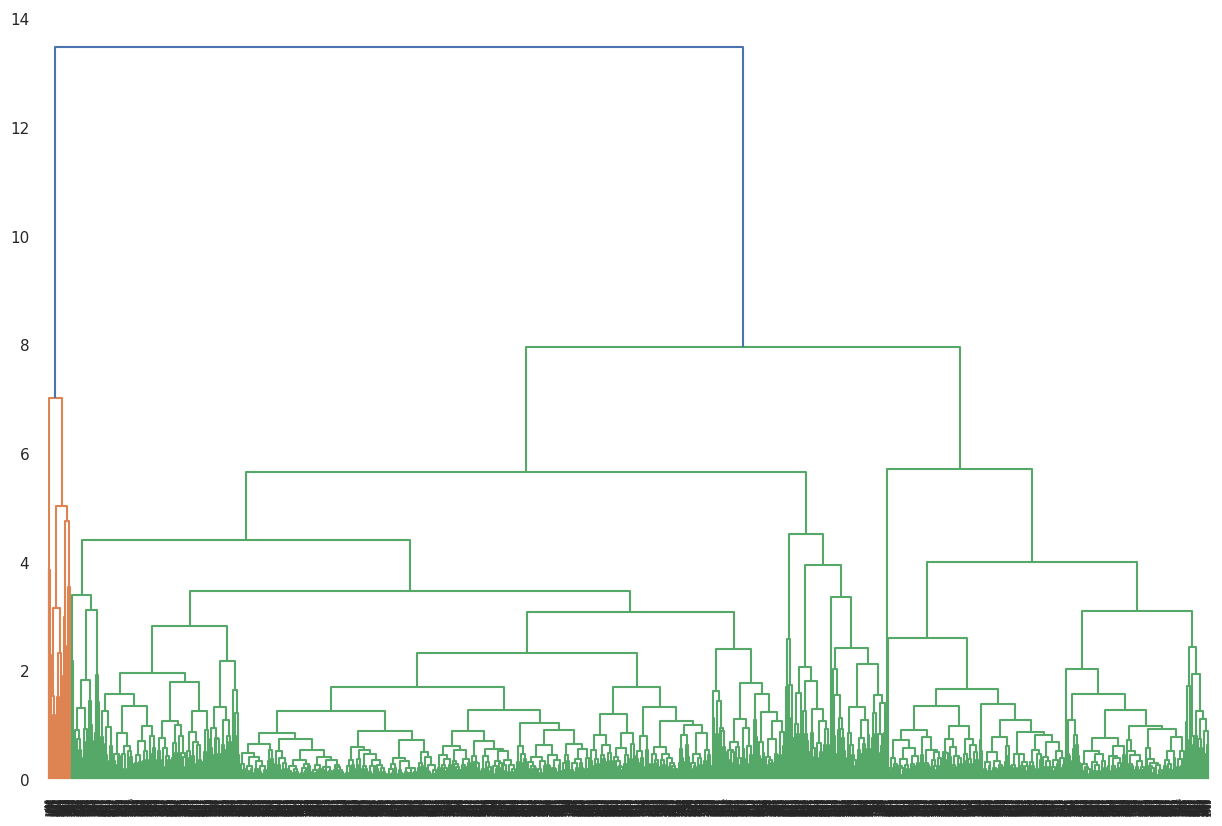

In [87]:
#Generates a dendrogram visualization for hierarchical clustering
#Complete Linkage:- it considers the maximum distance between any two points in different clusters. 
plt.figure(figsize=(15,10))
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()


**From the above dendogram plot, we can see the distribution of recency, frequency, and monetary metric values across the different clusters. So the 3 clusters seem to be separate from each other, which indicates a good heterogeneous mix of clusters.**



In [88]:
# 3 clusters
#cut_tree(mergings, n_clusters=3) assigns cluster labels to each data point based on the hierarchical clustering result stored 
#in the mergings variable. It cuts the dendrogram at a specified number of clusters, which in this case is 3
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels


array([0, 1, 1, ..., 0, 1, 1])

In [89]:
# assign cluster labels
customer_history_df['cluster_labels'] = cluster_labels
customer_history_df.head(6)

,CustomerID,Recency,Monetary,Frequency,cluster_id,cluster_labels
0,12346.0,326.0,0.00,2,1,0
1,12347.0,2.0,4310.00,182,2,1
2,12348.0,75.0,1797.24,31,0,1
3,12349.0,19.0,1757.55,73,0,1
4,12350.0,310.0,334.40,17,1,0
5,12352.0,36.0,1545.41,95,2,1


<Axes: xlabel='cluster_labels', ylabel='Recency'>

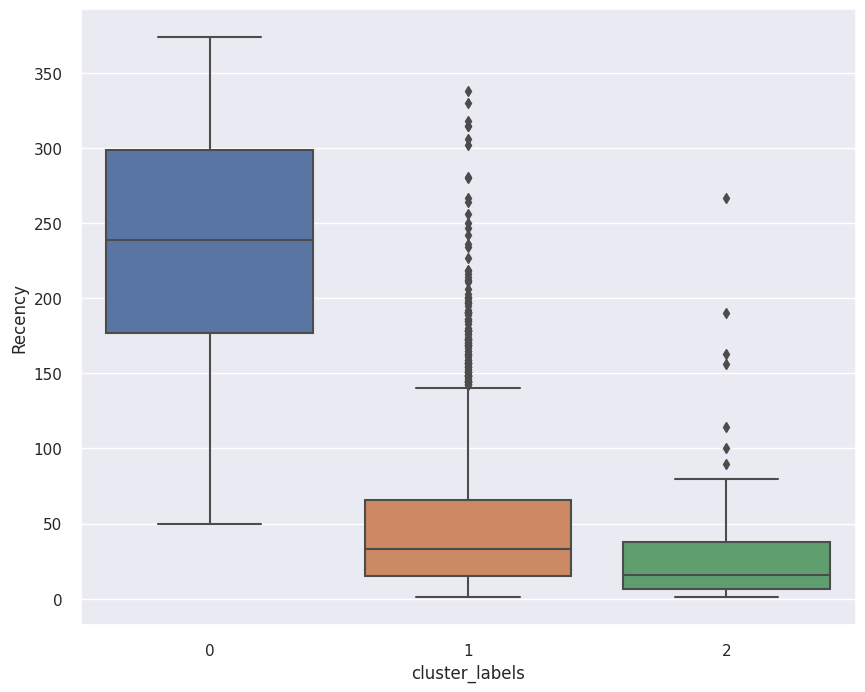

In [90]:
# plots
sns.boxplot(x='cluster_labels', y='Recency', data=customer_history_df)

<Axes: xlabel='cluster_labels', ylabel='Monetary'>

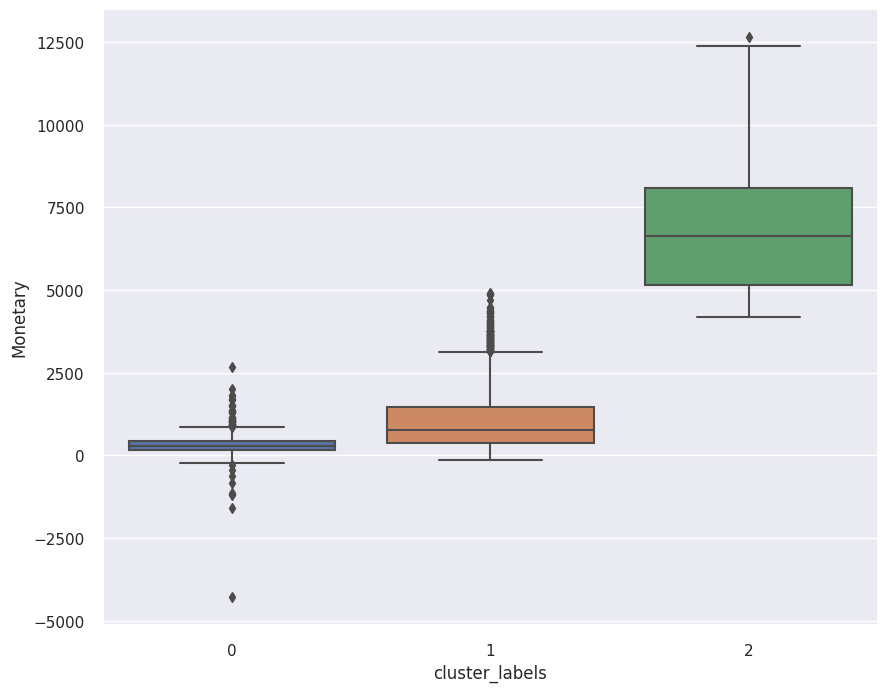

In [91]:
# plots
sns.boxplot(x='cluster_labels', y='Monetary', data=customer_history_df)

<Axes: xlabel='cluster_labels', ylabel='Frequency'>

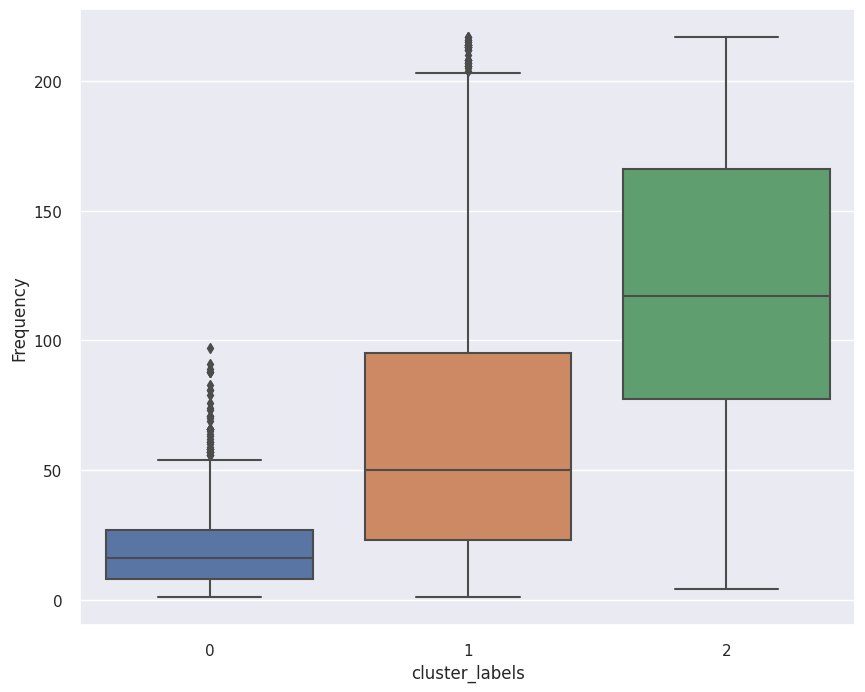

In [92]:
# plots
sns.boxplot(x='cluster_labels', y='Frequency', data=customer_history_df)




**From the above analysis, we can see that there should be 3 clusters in our data. To understand what these 3 clusters mean in a business scenario, we should look back the table comparing the clustering performance of 3 clusters for the mean values of recency, frequency, and monetary metric. On this basis, let us label the clusters as ‘New customers’, ‘Lost customers’ &‘Best customers’.**

**Below is the table giving the RFM interpretation of each segment and the points that a company is recommended to keep in mind while designing the marketing strategy for that segment of customers.**


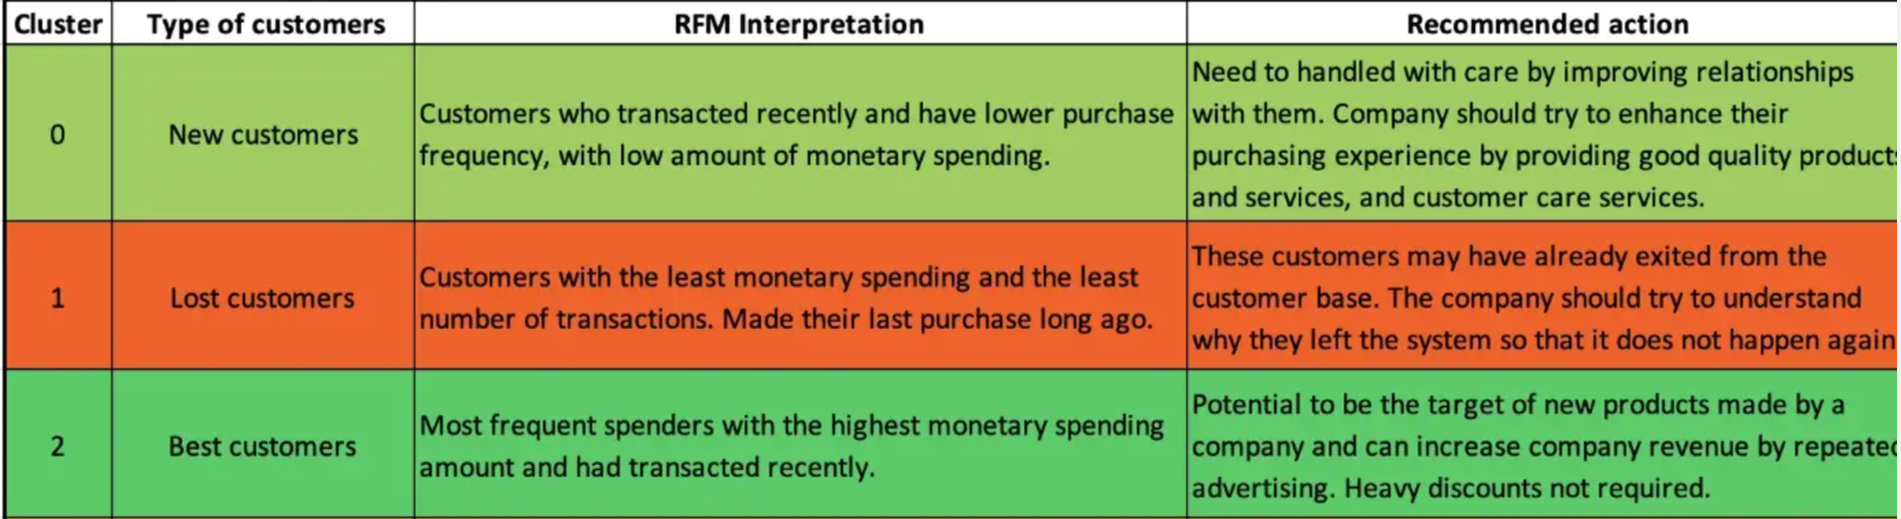


## ***10. 3-D Visualisation of R-F-M***

In [93]:
### visualize the result
import plotly.express as px
fig = px.scatter_3d(customer_history_df, x='Recency', y='Frequency', z='Monetary',
              color='cluster_labels' ,hover_data=['Monetary'])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
#fig.show()

###**CHALLENGES** 

**• Large Dataset to handle.**

**• Needs to plot lot of Graphs to analyze.** 

**• Lot of NaN values & duplicate values.**

 **• Continuous Runtime and RAM Crash due to large dataset.** 
 
 **• Find out the right number of ‘K’ for clusters.**